In [2]:
import numpy as np
import pandas as pd
from scipy import stats
# ------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
# ------------------------
import warnings
warnings.filterwarnings('ignore')
# from ydata_profiling import ProfileReport

In [3]:
sns.set_style('dark', rc={'axes.facecolor': '#e3e6e3',
                          'font.family': 'Montserrat',
                          'font.weight': 400,
                          'text.color': '#1a1f19',
                          'xtick.color': '#242c21',
                          'ytick.color': '#242c21',
                          'patch.force_edgecolor': False})
colors = ['#5a6b5c', '#697e68', '#7a9173', '#8ca57e', '#a0b889', '#b6cc93']
sns.set_palette(sns.color_palette(colors))

In [4]:
ds = pd.read_csv('D:/Datasets/fresh_data_science_salaries.csv')

## 1️⃣ Goal Setting

**Relationships:**
- Analyze relationships between categorical variables.
- Identify wage relationships between categorical variables.

**Salary Trends:**
- Compare total and specific wages across years.
- Modeling a regression model to determine the most influential variables on wages.

**Staff Demand:**
- Analyze demand for specialists across years.
    - Consider qualification level.
    - Consider company size.

**Remote Work:**
- Compare trends in remote work adoption.
<!-- - Assess the impact of remote work type on wages. -->

## 2️⃣ Context & Background

#### 1. Scanned Names & Categories
Prior knowledge of the data is required

In [5]:
ds.head(10)

work_year experience_level employment_type          job_title  salary  \
0       2024               SE              FT  Software Engineer  260000   
1       2024               SE              FT  Software Engineer  148049   
2       2024               SE              FT     Data Architect  120000   
3       2024               SE              FT     Data Architect   90000   
4       2024               EN              FT       AI Developer   92000   
5       2024               EN              FT       AI Developer   72176   
6       2024               EN              FT       Data Analyst   65000   
7       2024               EN              FT       Data Analyst   54600   
8       2024               EN              FT       Data Analyst  241500   
9       2024               EN              FT       Data Analyst  132300   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         260000                 US           100   
1             USD         148049                 US           100   
2             GBP         150000                 GB             0   
3             GBP         112500                 GB             0   
4             USD          92000                 US             0   
5             USD          72176                 US             0   
6             USD          65000                 US             0   
7             USD          54600                 US             0   
8             USD         241500                 US             0   
9             USD         132300                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               GB            M  
3               GB            M  
4               US            M  
5               US            M  
6               US            M  
7               US            M  
8               US            M  
9               US            M

In [6]:
ds.shape[0] #rows

27486

In [7]:
ds.apply(lambda x: print(f'{str.upper(x.name)}:\n{x.unique()}\n'))

WORK_YEAR:
[2024 2022 2023 2020 2021]

EXPERIENCE_LEVEL:
['SE' 'EN' 'MI' 'EX']

EMPLOYMENT_TYPE:
['FT' 'PT' 'CT' 'FL']

JOB_TITLE:
['Software Engineer' 'Data Architect' 'AI Developer' 'Data Analyst'
 'Data Scientist' 'Data Product Owner' 'Data Engineer'
 'Machine Learning Engineer' 'Engineering Manager' 'Software Developer'
 'Machine Learning Scientist' 'Solutions Architect' 'Research Scientist'
 'Applied Scientist' 'Analytics Engineer' 'DevOps Engineer'
 'Data Specialist' 'Business Intelligence Engineer'
 'Data Operations Analyst' 'Frontend Engineer' 'AI Engineer'
 'Data Analytics Specialist' 'Site Reliability Engineer'
 'Solutions Engineer' 'AI Architect' 'Research Engineer'
 'Data Analytics Lead' 'Research Associate' 'Data Manager' 'SAS Developer'
 'Business Intelligence Developer' 'Data Modeler' 'ETL Developer'
 'Business Analyst' 'Business Intelligence' 'Data Product Manager'
 'Decision Scientist' 'Data Visualization Engineer'
 'Encounter Data Management Professional' 'Data Strate

work_year             None
experience_level      None
employment_type       None
job_title             None
salary                None
salary_currency       None
salary_in_usd         None
employee_residence    None
remote_ratio          None
company_location      None
company_size          None
dtype: object

#### 2. Data Source & Collection Method

**Source link**:  
https://ai-jobs.net/  

**Collection method**:  
`…based on internal data (survey submissions (https://ai-jobs.net/salaries/form/) + jobs with open salaries)`

Despite the public availability of the electronic form (bias, intentionality),  
the number of observations in the data is greater than 15,000, thus mitigating this vulnerability.

#### 3. Collection Purpose

`Our goal is to have open salary data for everyone.`  
`So newbies, experienced pros, hiring managers, recruiters and also`  
`startup founders or people wanting to switch careers can make better decisions.`

#### 4. Timeframe

2020 – 2024  
`The data is processed and updated on a weekly basis`

#### 5. Limitations (Bias, External Influence)

**Missing data**:  

- **Job location**  
(city, state/province)  
▸ may influence salary levels

- **Industry or sector**  
▸ may influence salary levels

- **Requirements for each job title**  
▸ may influence salary levels

- **Education & Qualifications**  
(educational background, degrees, certifications)  
▸ may influence salary levels

- **Employee demographics**   
(age, gender, or ethnicity)  
▸ potential biases or disparities in compensation

**Yes, these points can affect results, but were  
looking for the general trend, not strict perfection.**  
*Merging data sources can be valuable*

## 3️⃣ Exploratory Data Analysis  

#### 1. Any incorrect types?

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27486 entries, 0 to 27485
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           27486 non-null  int64 
 1   experience_level    27486 non-null  object
 2   employment_type     27486 non-null  object
 3   job_title           27486 non-null  object
 4   salary              27486 non-null  int64 
 5   salary_currency     27486 non-null  object
 6   salary_in_usd       27486 non-null  int64 
 7   employee_residence  27486 non-null  object
 8   remote_ratio        27486 non-null  int64 
 9   company_location    27486 non-null  object
 10  company_size        27486 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.3+ MB


In [9]:
category_convert = ['experience_level', 'employment_type', 'employee_residence', 
                    'company_location', 'company_size', 'remote_ratio', 'salary_currency']

for column in category_convert:
    ds[column] = ds[column].astype('category')

In [10]:
# category_convert = ['experience_level', 'employment_type', 'company_size', 'remote_ratio']

# for column in category_convert:
#     ds[column] = ds[column].astype('category')

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27486 entries, 0 to 27485
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           27486 non-null  int64   
 1   experience_level    27486 non-null  category
 2   employment_type     27486 non-null  category
 3   job_title           27486 non-null  object  
 4   salary              27486 non-null  int64   
 5   salary_currency     27486 non-null  category
 6   salary_in_usd       27486 non-null  int64   
 7   employee_residence  27486 non-null  category
 8   remote_ratio        27486 non-null  category
 9   company_location    27486 non-null  category
 10  company_size        27486 non-null  category
dtypes: category(7), int64(3), object(1)
memory usage: 1.0+ MB


#### 2. Any missing values?

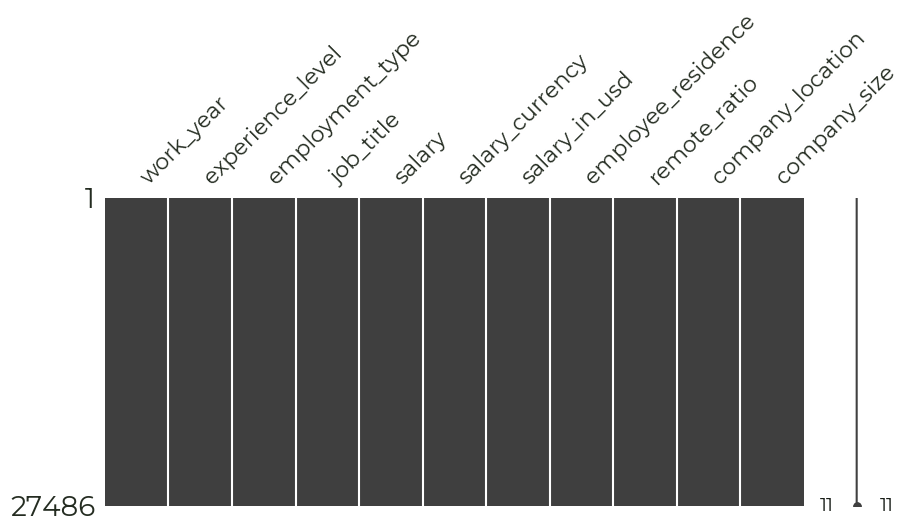

In [12]:
msno.matrix(ds, figsize=[10, 4])
plt.show()

**No**. There is no missing data.

#### 3. Any duplicates?

##### a. Ratio

In [13]:
print(ds.duplicated().sum(), '/', ds.shape[0])
print('------------', '\n')
print('Vertical plane:')
by_column = ds.apply(lambda x: x.duplicated().value_counts(normalize=True))
(by_column * 100).round(2)

12478 / 27486
------------ 

Vertical plane:


work_year  experience_level  employment_type  job_title  salary  \
True       99.98             99.99            99.99       99.3   86.35   
False       0.02              0.01             0.01        0.7   13.65   

       salary_currency  salary_in_usd  employee_residence  remote_ratio  \
True             99.91          84.83               99.67         99.99   
False             0.09          15.17                0.33          0.01   

       company_location  company_size  
True              99.71         99.99  
False              0.29          0.01

- 45% in general (horizontal plane)
- 85-99% / column (vertical plane)

##### b. Duplicate origin

(a) Lack of unique identifiers and (b) low uniqueness within columns  
suggests frequent intersections of common values (e.g., 2023, US, Data Scientist).

In [14]:
row_dupl = ds[ds.duplicated()].value_counts().reset_index()
row_dupl[:10]

work_year experience_level employment_type                  job_title  \
0       2023               SE              FT          Applied Scientist   
1       2024               MI              FT          Applied Scientist   
2       2024               MI              FT          Applied Scientist   
3       2023               SE              FT  Machine Learning Engineer   
4       2024               SE              FT             Data Architect   
5       2024               SE              FT          Applied Scientist   
6       2023               SE              FT  Machine Learning Engineer   
7       2024               SE              FT              Data Engineer   
8       2024               SE              FT             Data Scientist   
9       2024               SE              FT             Data Architect   

   salary salary_currency  salary_in_usd employee_residence remote_ratio  \
0  136000             USD         136000                 US            0   
1  222200             USD         222200                 US            0   
2  136000             USD         136000                 US            0   
3  204500             USD         204500                 US            0   
4  117000             USD         117000                 US            0   
5  260000             USD         260000                 US            0   
6  142200             USD         142200                 US            0   
7  180000             USD         180000                 US            0   
8  235400             USD         235400                 US            0   
9  175000             USD         175000                 US            0   

  company_location company_size  count  
0               US            L     53  
1               US            L     42  
2               US            L     42  
3               US            M     34  
4               US            M     34  
5               US            L     34  
6               US            M     33  
7               US            M     31  
8               US            M     30  
9               US            M     30

Interesting observation regarding the `Applied Scientist` and `Machine Learning Engineer` positions  
(salaries are pretty specific, that's the point)

##### c. Handling

The best approach depends on a specific problem and nature of the data

- **Nothing**  
- **Deletion**  
- **Treating as a feature**  
(duplicates can help spot oddities, like many similar entries in fraud cases)
- **Rule-based deduplication**  
(keeping the most recent or most informative duplicate)
- **Aggregation**  
(summarizing duplicate info if it has details (timestamps, measurements))

If there were unique identifiers I would definitely consider  
`Treating as a feature`, but in this case `Nothing` is most appropriate

#### 4. Any inconsistencies?

Duplicate titles with varying lengths in `job_title` need cleaning for accurate analysis  

In [15]:
ds_copy = ds.copy()

**Global value replacement requires a dataset copy first**

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
ds_copy[ds_copy.job_title.str.contains('Engineer', case=False)].job_title.value_counts()

job_title
Data Engineer                               5195
Machine Learning Engineer                   2827
Software Engineer                           1151
Analytics Engineer                           652
Research Engineer                            556
Business Intelligence Engineer               364
AI Engineer                                  237
Computer Vision Engineer                      65
MLOps Engineer                                48
Machine Learning Infrastructure Engineer      37
Engineering Manager                           36
Data Integration Engineer                     36
Robotics Engineer                             34
Data Infrastructure Engineer                  32
DevOps Engineer                               26
Cloud Database Engineer                       23
Prompt Engineer                               21
Data Operations Engineer                      20
NLP Engineer                                  19
Systems Engineer                              18
Software D

I also use the built-in `CTRL+F` in Jupyter + the ability to use `regex expressions` in it for convenience and accuracy

In [18]:
ds_copy[ds_copy.job_title.str.contains('Analy', case=False)].job_title.value_counts()

job_title
Data Analyst                          3659
Analytics Engineer                     652
Business Intelligence Analyst          321
Research Analyst                       221
Data Analytics Manager                  90
BI Analyst                              70
Data Analytics Lead                     51
Data Quality Analyst                    49
Data Management Analyst                 40
Data Operations Analyst                 34
Insight Analyst                         32
Business Data Analyst                   21
BI Data Analyst                         19
Data Analytics Specialist               18
Data Visualization Analyst              15
Data Analytics Consultant               14
Business Analyst                        14
Data Reporting Analyst                  12
Data Governance Analyst                 10
Product Data Analyst                     6
Lead Data Analyst                        6
Data Analytics Engineer                  5
Admin & Data Analyst                     5
F

In [19]:
ds_copy[ds_copy.job_title.str.contains('BI|Business Intelligence', case=False)].job_title.value_counts()

job_title
Business Intelligence Engineer        364
Business Intelligence Analyst         321
Business Intelligence                 214
BI Developer                          146
Business Intelligence Developer       107
BI Analyst                             70
Business Intelligence Manager          28
Business Intelligence Lead             20
BI Data Analyst                        19
Site Reliability Engineer              18
Big Data Engineer                      12
Business Intelligence Specialist       10
Computational Biologist                 4
BI Engineer                             4
Business Intelligence Data Analyst      2
Business Intelligence Consultant        2
Director of Business Intelligence       2
Head of Business Intelligence           2
Big Data Architect                      2
Big Data Developer                      1
Power BI Developer                      1
BI Data Engineer                        1
Name: count, dtype: int64

In [20]:
ds_copy[ds_copy.job_title.str.contains('Scientist', case=False)].job_title.value_counts()

job_title
Data Scientist                        6144
Research Scientist                    1115
Applied Scientist                      737
Machine Learning Scientist             198
Decision Scientist                      78
AI Scientist                            40
Applied Machine Learning Scientist      14
Applied Data Scientist                  13
Lead Data Scientist                     11
Principal Data Scientist                10
AI Research Scientist                    4
Staff Data Scientist                     2
Data Scientist Lead                      2
AI Data Scientist                        1
Applied Research Scientist               1
Marketing Data Scientist                 1
Name: count, dtype: int64

In [21]:
ds_copy[ds_copy.job_title.str.contains('Science', case=False)].job_title.value_counts()

job_title
Data Science Tech Lead    1
Name: count, dtype: int64

In [22]:
ds_copy[ds_copy.job_title.str.contains('Data', case=False)].job_title.value_counts()

job_title
Data Scientist                            6144
Data Engineer                             5195
Data Analyst                              3659
Data Architect                             707
Data Manager                               312
Data Specialist                            162
Data Analytics Manager                      90
Head of Data                                81
Data Modeler                                78
Data Product Manager                        70
Data Analytics Lead                         51
Data Quality Analyst                        49
Data Lead                                   40
Data Management Analyst                     40
Data Strategist                             38
Data Developer                              38
Data Integration Engineer                   36
Data Operations Analyst                     34
Data Infrastructure Engineer                32
Data Management Specialist                  31
Data Visualization Specialist               28
Dat

In [23]:
ds_copy[ds_copy.job_title.str.contains('ML|Machine Learning', case=False)].job_title.value_counts()

job_title
Machine Learning Engineer                   2827
Machine Learning Scientist                   198
MLOps Engineer                                48
Machine Learning Infrastructure Engineer      37
Machine Learning Researcher                   35
Machine Learning Developer                    18
Machine Learning Software Engineer            15
Applied Machine Learning Scientist            14
Machine Learning Manager                      10
Machine Learning Modeler                      10
Head of Machine Learning                       9
Machine Learning Platform Engineer             8
Machine Learning Model Engineer                6
Machine Learning Quality Engineer              6
Lead Machine Learning Engineer                 5
Machine Learning Research Engineer             5
Machine Learning Specialist                    3
Principal Machine Learning Engineer            3
Applied Machine Learning Engineer              3
Machine Learning Architect                     2
ML Infrast

In [24]:
ds_copy[ds_copy.job_title.str.contains('AI|Artificial Intelligence', case=False)].job_title.value_counts()

job_title
AI Engineer                         237
AI Architect                         61
AI Scientist                         40
AI Developer                         39
AI Software Engineer                 11
AI Product Manager                    9
AI Programmer                         9
AI Research Engineer                  8
AI Specialist                         8
AI Researcher                         5
Head of AI                            4
AI Solution Architect                 4
AI Research Scientist                 4
Artificial Intelligence Engineer      2
AI Data Scientist                     1
Lead AI Engineer                      1
AI Software Development Engineer      1
Name: count, dtype: int64

In [25]:
ds_copy[ds_copy.job_title.str.contains('Lead|Head', case=False)].job_title.value_counts()

job_title
Head of Data                      81
Data Analytics Lead               51
Data Lead                         40
Business Intelligence Lead        20
Data Team Lead                    14
Lead Data Scientist               11
Data Governance Lead              10
Head of Machine Learning           9
Lead Data Analyst                  6
Lead Data Engineer                 6
Data Management Lead               6
Lead Machine Learning Engineer     5
Head of AI                         4
Head of Business Intelligence      2
Data Analytics Team Lead           2
Data Analyst Lead                  2
Data Scientist Lead                2
Data Strategy Lead                 2
Lead AI Engineer                   1
Data Science Tech Lead             1
Name: count, dtype: int64

In [26]:
ds_copy[ds_copy.job_title.str.contains('Manag', case=False)].job_title.value_counts()

job_title
Data Manager                              312
Data Analytics Manager                     90
Data Product Manager                       70
Data Management Analyst                    40
Engineering Manager                        36
Data Management Specialist                 31
Business Intelligence Manager              28
Data Quality Manager                       14
Encounter Data Management Professional     12
Machine Learning Manager                   10
Data Operations Manager                    10
AI Product Manager                          9
Data Management Lead                        6
Data Management Manager                     6
Data Management Associate                   4
Data Management Consultant                  4
Data Strategy Manager                       4
Data Governance Manager                     2
Manager Data Management                     2
Analytics Engineering Manager               1
Name: count, dtype: int64

In [27]:
ds_copy[ds_copy.job_title.str.contains('ML Operations Engineer|MLOps', case=False)].job_title.value_counts()

job_title
MLOps Engineer    48
Name: count, dtype: int64

In [28]:
ds_copy.job_title.replace({'^Data Science Engineer$': 'Data Engineer',
                           '^Data Science Analyst$': 'Data Analyst',
                           '^Data Science Manager$': 'Data Manager',
                           'Machine Learning': 'ML', 
                           '^ML Ops$|^ML Operations': 'MLOps',
                           'Artificial Intelligence': 'AI', 
                           'Business Intelligence': 'BI',
                           '^BI Data Analyst$': 'BI Analyst',
                           '^Finance Data Analyst$': 'Financial Data Analyst',
                           '^Head of Data Science$': 'Head of Data',
                           '^Data Lead$': 'Head of Data',
                           '^Data Science Lead$': 'Head of Data Science',
                           '^Bear Robotics$': 'Robotics Engineer',
                           '^Data Analyst Lead$': 'Lead Data Analyst',
                           '^Data Scientist Lead$': 'Lead Data Scientist',
                           '^Data Science Tech Lead$': 'Tech Lead Data Science',
                           '^Data Science Director$': 'Director of Data Science',
                           '^Data Analytics Engineer$': 'Analytics Engineer',
                           '^Applied Data Scientist$': 'Applied Scientist'},
                           inplace=True, regex=True)

In [29]:
ds_copy.job_title.value_counts()

job_title
Data Scientist                            6144
Data Engineer                             5195
Data Analyst                              3659
ML Engineer                               2827
Software Engineer                         1151
Research Scientist                        1115
Applied Scientist                          750
Data Architect                             707
Analytics Engineer                         657
Research Engineer                          556
BI Analyst                                 410
BI Engineer                                368
Data Manager                               312
BI Developer                               253
AI Engineer                                239
Research Analyst                           221
BI                                         214
ML Scientist                               198
Data Specialist                            162
Head of Data                               121
Data Analytics Manager                      90
Dec

In [30]:
pd.reset_option('display.max_rows')

If all is well, we can assign new changes to the original dataset

In [31]:
ds = ds_copy

#### 5. Any outliers?

- **Normal distribution:** Z-scores (more sensitive)
- **Skewed or non-normal distribution:** IQR (robust)

Salaries are **skewed to the right**, so IQR would be the appropriate method.

In [32]:
Q1 = ds.salary_in_usd.quantile(0.25)
Q3 = ds.salary_in_usd.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_boud = Q3 + 1.5 * IQR

outliers = (ds.salary_in_usd < lower_bound) | (ds.salary_in_usd > upper_boud)

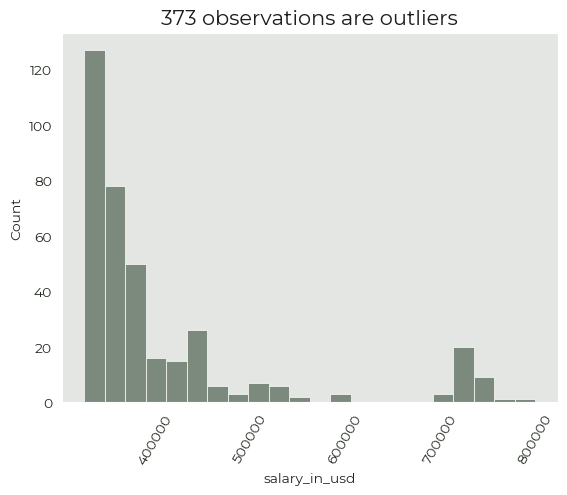

In [33]:
ax = sns.histplot(data=ds[outliers], x='salary_in_usd', linewidth=0.5)
ax.set_title(f'{outliers.sum()} observations are outliers', size=15)
plt.xticks(rotation=60)
plt.show()

# ax.figure.savefig('outliers', dpi=300, bbox_inches='tight')

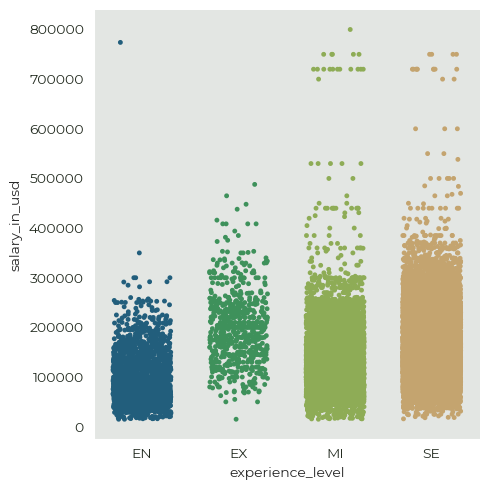

In [34]:
sns.catplot(data=ds, x='experience_level', y='salary_in_usd', kind='strip', jitter=0.3, size=3.5, palette='gist_earth')
plt.show()



In [35]:
outl_600plus = ds[ds.salary_in_usd > 6e5]
outl_600plus

work_year experience_level employment_type           job_title  salary  \
126         2024               MI              FT        ML Scientist  720000   
1027        2024               MI              FT       Data Engineer  720000   
1336        2024               SE              FT  Analytics Engineer  720000   
1652        2024               SE              FT      Data Scientist  750000   
3087        2024               SE              FT      Data Scientist  720000   
3209        2024               MI              FT   Software Engineer  720000   
4813        2024               SE              FT   Software Engineer  700000   
5979        2024               MI              FT   Research Engineer  720000   
5981        2024               MI              FT   Research Engineer  720000   
7558        2024               SE              FT       Data Engineer  720000   
7949        2024               MI              FT  Analytics Engineer  720000   
8984        2024               SE              FT  Research Scientist  720000   
9567        2024               SE              FT  Analytics Engineer  720000   
11345       2024               SE              FT  Analytics Engineer  720000   
13095       2024               MI              FT        ML Scientist  720000   
13254       2024               SE              FT      Data Scientist  720000   
13756       2024               MI              FT        AI Architect  800000   
14599       2024               EN              FT        Data Analyst  774000   
14607       2024               MI              FT  Analytics Engineer  720000   
15082       2024               SE              FT  Analytics Engineer  720000   
15262       2024               SE              FT      Data Scientist  720000   
15398       2024               SE              FT  Analytics Engineer  750000   
15574       2024               MI              FT        ML Scientist  750000   
15985       2024               SE              FT        Data Analyst  750000   
16760       2024               MI              FT        ML Scientist  750000   
16790       2024               MI              FT   Research Engineer  720000   
16800       2024               MI              FT  Research Scientist  720000   
16804       2024               MI              FT   Research Engineer  720000   
17358       2023               MI              FT        ML Scientist  750000   
17364       2023               MI              FT         ML Engineer  750000   
17667       2023               SE              FT  Analytics Engineer  700000   
18294       2023               MI              FT  Analytics Engineer  700000   
18342       2023               MI              FT       Data Engineer  750000   
18450       2023               SE              FT      Data Scientist  750000   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
126               USD         720000                 US            0   
1027              USD         720000                 US          100   
1336              USD         720000                 US            0   
1652              USD         750000                 US            0   
3087              USD         720000                 US            0   
3209              USD         720000                 US          100   
4813              USD         700000                 US          100   
5979              USD         720000                 US            0   
5981              USD         720000                 US            0   
7558              USD         720000                 US            0   
7949              USD         720000                 US            0   
8984              USD         720000                 US            0   
9567              USD         720000                 US            0   
11345             USD         720000                 US            0   
13095             USD         720000                 US            0   
13254             U

In [36]:
outl_600plus.job_title.value_counts()

job_title
Analytics Engineer    9
ML Scientist          5
Data Scientist        5
Research Engineer     4
Data Engineer         3
Software Engineer     2
Research Scientist    2
Data Analyst          2
AI Architect          1
ML Engineer           1
Name: count, dtype: int64

In [37]:
outl_600plus.experience_level.value_counts()

experience_level
MI    18
SE    15
EN     1
EX     0
Name: count, dtype: int64

**Values exceeding 600,000 will be capped at the median for the qualification and position.**

In [38]:
def replace_median(row):
    
    median = ds[(ds.experience_level == row.experience_level) & (ds.job_title == row.job_title)].salary_in_usd.median()
    row.salary_in_usd = median
    row.salary = median

    return row

ds.iloc[outl_600plus.index] = outl_600plus.apply(replace_median, axis=1)
ds.iloc[outl_600plus.index].head()

work_year experience_level employment_type           job_title  salary  \
126        2024               MI              FT        ML Scientist  165000   
1027       2024               MI              FT       Data Engineer  120000   
1336       2024               SE              FT  Analytics Engineer  150000   
1652       2024               SE              FT      Data Scientist  165100   
3087       2024               SE              FT      Data Scientist  165100   

     salary_currency  salary_in_usd employee_residence remote_ratio  \
126              USD         165000                 US            0   
1027             USD         120000                 US          100   
1336             USD         150000                 US            0   
1652             USD         165100                 US            0   
3087             USD         165100                 US            0   

     company_location company_size  
126                US            M  
1027               US            M  
1336               US            M  
1652               US            M  
3087               US            M

In [39]:
ds[ds.salary_in_usd > 6e5]

work_year experience_level employment_type     job_title  salary  \
13756       2024               MI              FT  AI Architect  800000   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
13756             USD         800000                 CA          100   

      company_location company_size  
13756               CA            M

In [40]:
ai_arch_median = ds[ds.job_title == 'AI Architect'].salary_in_usd.median()
ds.loc[13756, 'salary_in_usd'] = ai_arch_median
ds.loc[13756, 'salary'] = ai_arch_median

In [41]:
ds.loc[13756]

work_year                     2024
experience_level                MI
employment_type                 FT
job_title             AI Architect
salary                      208000
salary_currency                USD
salary_in_usd               208000
employee_residence              CA
remote_ratio                   100
company_location                CA
company_size                     M
Name: 13756, dtype: object

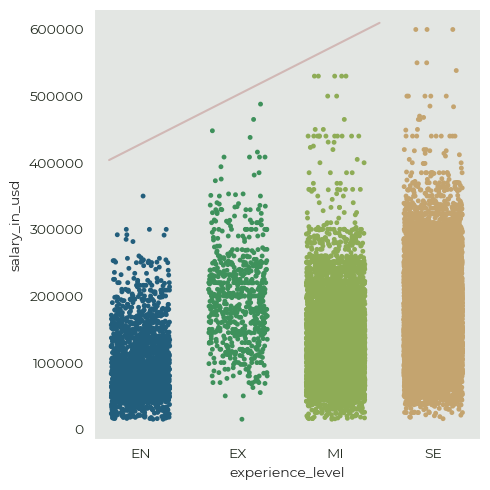

In [42]:
sns.catplot(data=ds, x='experience_level', y='salary_in_usd', kind='strip', jitter=0.3, size=3.5, palette='gist_earth').figure.savefig('outliers3', dpi=300, bbox_inches='tight')
plt.plot([0.04, 0.74], [0.65, 0.97], transform=plt.gca().transAxes, alpha=0.2, color='darkred')
plt.show()

#### 6. Feature engineering 1

1. It would be great to categorize `job_title` into major groups for deeper analysis.
2. It would also be nice to segment dollar salaries into groups.

**`job_title`**:

- Data
- Engineer
- Scientist
- Analyst
- ML
- AI
- BI
- Manager
- Research
- Applied

The other groups that could be investigated:
- Specialist
- Consultant
- Lead
- Head
- Director
- Principal
- Big Data
- Cloud Data

**`salary_in_usd`**:  
(in thousands)  

- 0-50
- 50-100
- 100-150
- 150-200
- 200-250
- 250-300
- 300-350
- 350-400
- 400+

In [43]:
job_groups = ['Data', 'Engineer', 'Scientist', 'Analyst', 'ML', 'AI', 'BI', 'Manager', 'Research', 'Applied']

filtered_job = {}

for keyword in job_groups:
    mask = ds.job_title.str.contains(keyword)
    filtered_job[keyword] = ds[mask]

In [44]:
filtered_job['BI'].head()

work_year experience_level employment_type     job_title  salary  \
200       2024               SE              FT   BI Engineer  175000   
201       2024               SE              FT   BI Engineer   80000   
202       2024               SE              FT   BI Engineer  178200   
203       2024               SE              FT   BI Engineer   74800   
370       2024               SE              FT  BI Developer  164200   

    salary_currency  salary_in_usd employee_residence remote_ratio  \
200             USD         175000                 US            0   
201             USD          80000                 US            0   
202             USD         178200                 US            0   
203             USD          74800                 US            0   
370             USD         164200                 US            0   

    company_location company_size  
200               US            M  
201               US            M  
202               US            M  
203               US            M  
370               US            M

In [45]:
bins = [0, 5e4, 1e5, 15e4, 2e5, 25e4, 3e5, 35e4, 4e5, ds['salary_in_usd'].max()]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400+']

ds['grouped_salary_usd'] = pd.cut(ds.salary_in_usd, bins=bins, labels=labels)

In [46]:
ds['grouped_salary_usd'].head()

0    250-300
1    100-150
2    100-150
3    100-150
4     50-100
Name: grouped_salary_usd, dtype: category
Categories (9, object): ['0-50' < '50-100' < '100-150' < '150-200' ... '250-300' < '300-350' < '350-400' < '400+']

#### 7. Analyze variable distribution
(initial mental model of the dataset)

For readability, I'll get rid of the "20" at the beginning of each year

In [47]:
ds.work_year = ds.work_year.astype('str').str.slice(-2).astype('category')

In [48]:
ds.work_year.value_counts()

work_year
24    17014
23     8522
22     1657
21      218
20       75
Name: count, dtype: int64

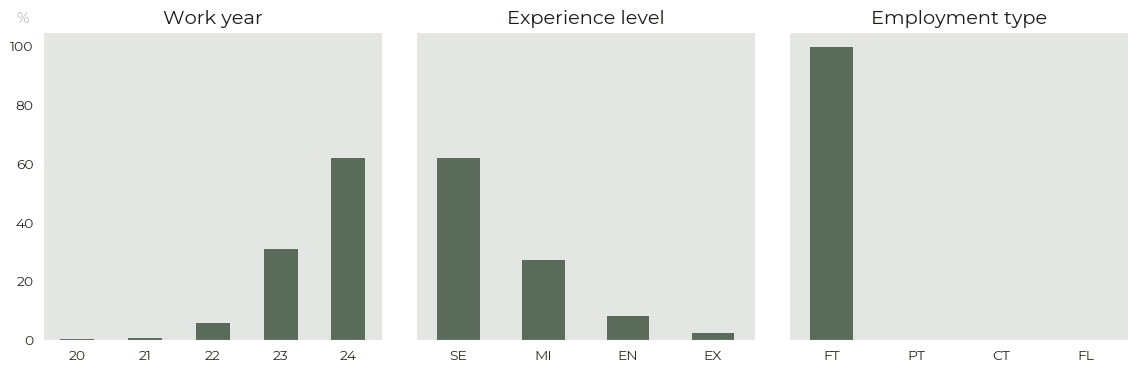

In [49]:
fig, axes = plt.subplots(1, 3, figsize=[14, 4], sharey=True)
fig.subplots_adjust(wspace = 0.1)

(ds.work_year.value_counts(normalize=True) * 100).sort_index().plot(kind = 'bar', ax = axes[0])
(ds.experience_level.value_counts(normalize=True) * 100).plot(kind = 'bar', ax = axes[1])
(ds.employment_type.value_counts(normalize=True) * 100).plot(kind = 'bar', ax = axes[2])

for i, j in enumerate(ds.columns[:3]):
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].set_title(j.replace('_', ' ').capitalize(), size = 14)
    axes[i].set_xlabel('')
    
axes[0].set_yticks(range(0, 120, 20))
axes[0].text(-0.08, 1.03, '%', transform=axes[0].transAxes, alpha=0.3, size=11)

plt.show()

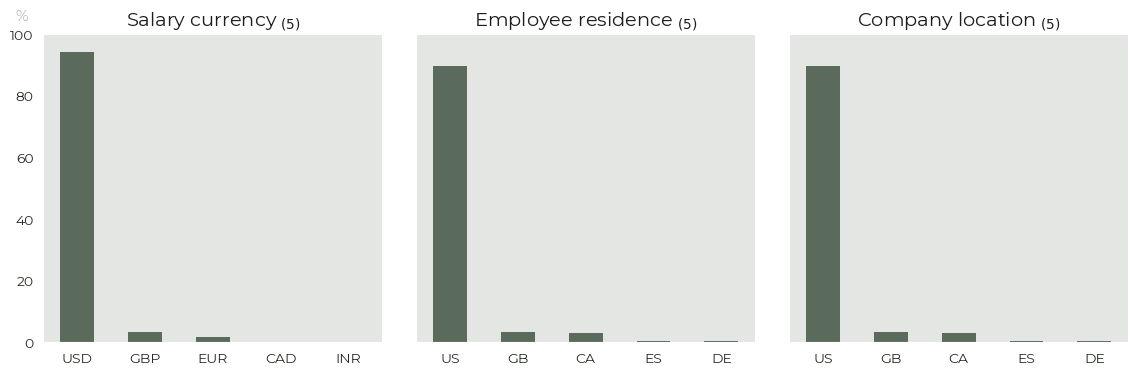

In [50]:
fig, axes = plt.subplots(1, 3, figsize=[14, 4], sharey=True)
fig.subplots_adjust(wspace = 0.1)

filtered_cur = ds.salary_currency.value_counts(normalize=True)[:5]
(filtered_cur * 100).plot(kind = 'bar', ax = axes[0])

filtered_res = ds.employee_residence.value_counts(normalize=True)[:5]
(filtered_res * 100).plot(kind = 'bar', ax = axes[1])

filtered_loc = ds.company_location.value_counts(normalize=True)[:5]
(filtered_loc * 100).plot(kind = 'bar', ax = axes[2])

for i, j in enumerate(ds.columns[[5, 7, 9]]):
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].set_title(j.replace('_', ' ').capitalize() + '$_{~(5)}$', size = 14)
    axes[i].set_xlabel('')
    
axes[0].set_yticks(range(0, 120, 20))
axes[0].text(-0.082, 1.045, '%', transform=axes[0].transAxes, alpha=0.3, size=11)

plt.show()

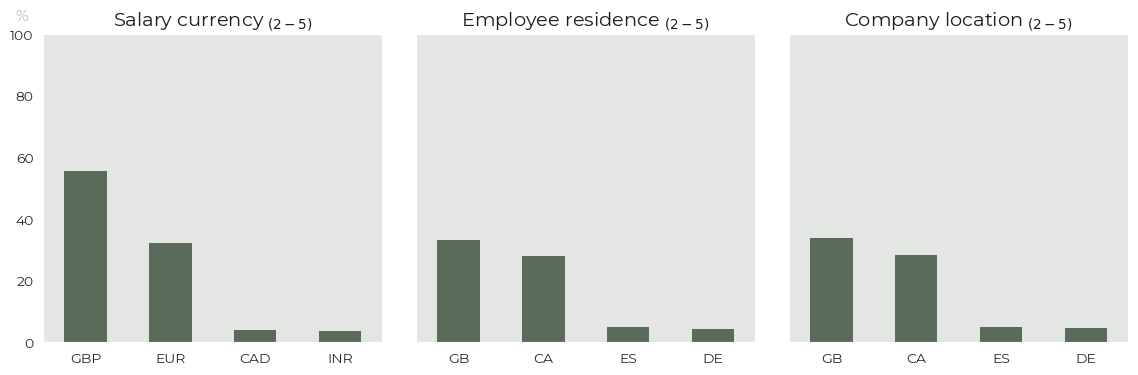

In [51]:
fig, axes = plt.subplots(1, 3, figsize=[14, 4], sharey=True)
fig.subplots_adjust(wspace = 0.1)

filtered_cur = ds[~ds.salary_currency.isin(['USD'])].salary_currency.value_counts(normalize=True)[:4]
(filtered_cur * 100).plot(kind = 'bar', ax = axes[0])

filtered_res = ds[~ds.employee_residence.isin(['US'])].employee_residence.value_counts(normalize=True)[:4]
(filtered_res * 100).plot(kind = 'bar', ax = axes[1])

filtered_loc = ds[~ds.company_location.isin(['US'])].company_location.value_counts(normalize=True)[:4]
(filtered_loc * 100).plot(kind = 'bar', ax = axes[2])

for i, j in enumerate(ds.columns[[5, 7, 9]]):
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].set_title(j.replace('_', ' ').capitalize() + '$_{~(2-5)}$', size = 14)
    axes[i].set_xlabel('')
    
axes[0].set_yticks(range(0, 120, 20))
axes[0].text(-0.082, 1.045, '%', transform=axes[0].transAxes, alpha=0.3, size=11)

plt.show()

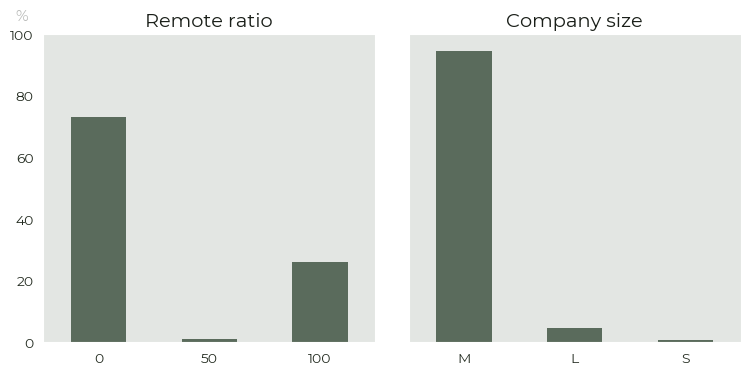

In [52]:
fig, axes = plt.subplots(1, 2, figsize=[9, 4], sharey=True)
fig.subplots_adjust(wspace = 0.1)

(ds.remote_ratio.value_counts(normalize=True) * 100).sort_index().plot(kind = 'bar', ax = axes[0])
(ds.company_size.value_counts(normalize=True) * 100).plot(kind = 'bar', ax = axes[1])

for i, j in enumerate(ds.columns[[8, 10]]):
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].set_title(j.replace('_', ' ').capitalize(), size = 14)
    axes[i].set_xlabel('')
    
axes[0].set_yticks(range(0, 120, 20))
axes[0].text(-0.084, 1.045, '%', transform=axes[0].transAxes, alpha=0.3, size=11)

plt.show()

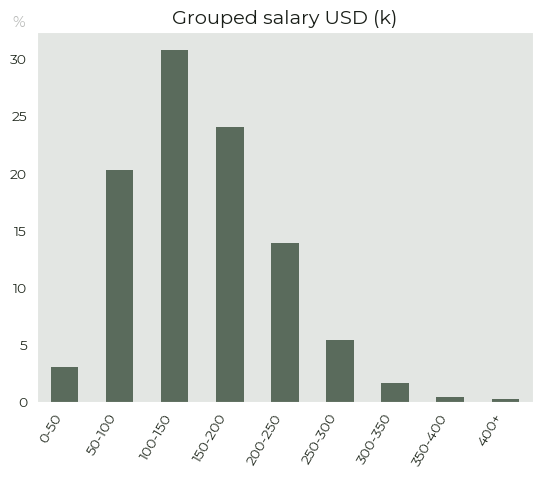

In [53]:
ax = (ds.grouped_salary_usd.value_counts(normalize=True, sort=False, ascending=False) * 100).plot(kind='bar')
ax.set_xlabel('')
ax.set_title('Grouped salary USD (k)', size = 14)
ax.text(-0.05, 1.015, '%', transform=ax.transAxes, alpha=0.3, size=11)
plt.xticks(rotation=60, ha='right')
ax.figure.savefig('var_distr_5', dpi=300, bbox_inches='tight')
plt.show()

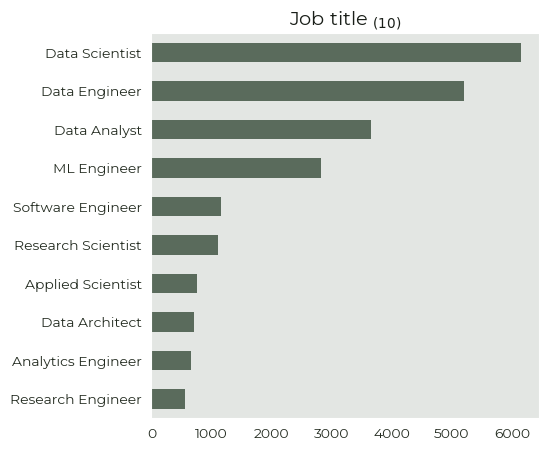

In [54]:
ax = ds.job_title.value_counts().sort_values(ascending=True)[-10:].plot(kind='barh', figsize=[5, 5])
ax.set_ylabel('')
ax.set_title('Job title $_{(10)}$', size = 14)

plt.show()

**Including the first 4**:

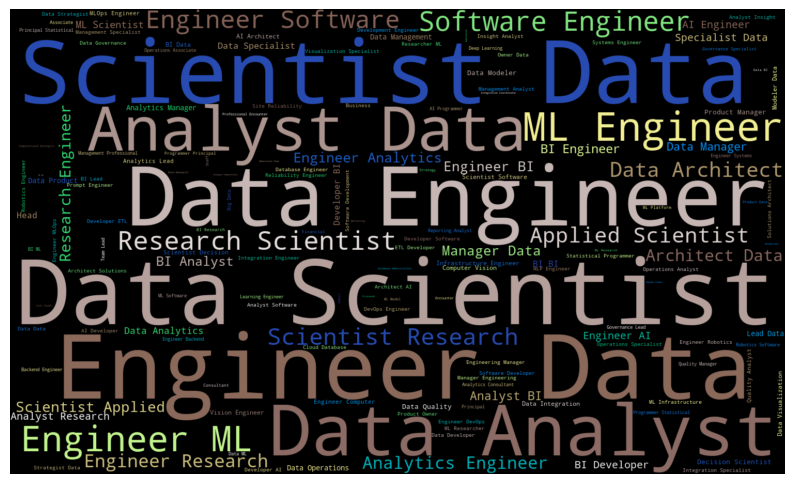

In [55]:
text = " ".join(ds.job_title)

wordcloud = WordCloud(width=1500, height=900, colormap='terrain', stopwords=STOPWORDS).generate(text)

fig = plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Without the first 4**:

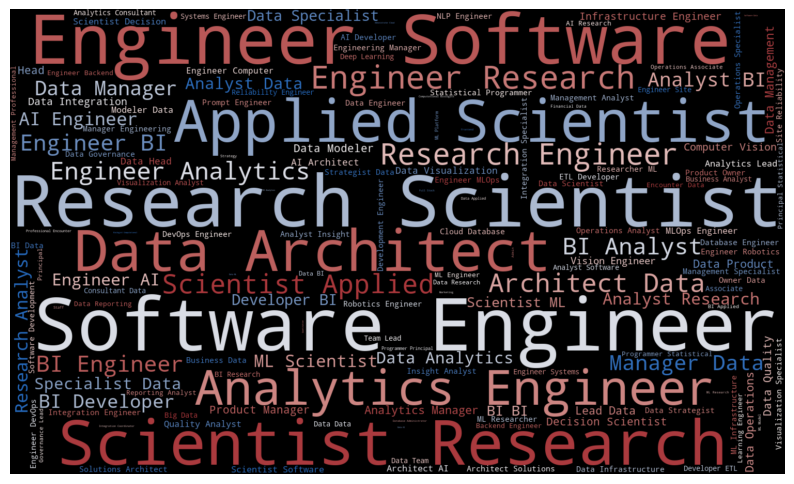

In [56]:
text = " ".join(ds.job_title[~ds.job_title.isin(['Data Engineer', 'Data Analyst', 'Data Scientist', 'ML Engineer'])])

wordcloud = WordCloud(width=1500, height=900, colormap='vlag', stopwords=STOPWORDS).generate(text)

fig = plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### **Groups within `job_title`**
Groups within `filtered_job`: Data, Engineer, Scientist, Analyst, ML, AI, BI, Manager, Research, Applied

In [57]:
def filtered_job_func(job_group):
    
    fig = plt.figure(figsize=[4.8, 5])

    job_titles = filtered_job[job_group].job_title
    axis = job_titles.value_counts(ascending=True)
    axis_norm = job_titles.value_counts(ascending=True, normalize=True)
    
    if len(axis) > 10:
        axis = axis[-10:]
        axis_norm = axis_norm[-10:]

    ax = axis.plot(kind='barh')
    ax.set_ylabel('')
    ax.set_xticklabels('')
    ax.set_title(job_group.upper() + r' group $_{(\text{up to}~10)}$', size=14)
    ax.text(1.02, 1.03, axis.sum(), transform=ax.transAxes, alpha=0.35)
    ax.set_facecolor('none')

    for i, bar in enumerate(ax.patches):
        ax.text(bar.get_width() + (axis.max() * 0.01), 
                bar.get_y() + 0.15, 
                f'{axis.iloc[i]} ({int(np.ceil(axis_norm.iloc[i] * 100))}%)',
                ma='center', fontsize=8.4, fontweight='medium', color='grey')
    
    plt.show()

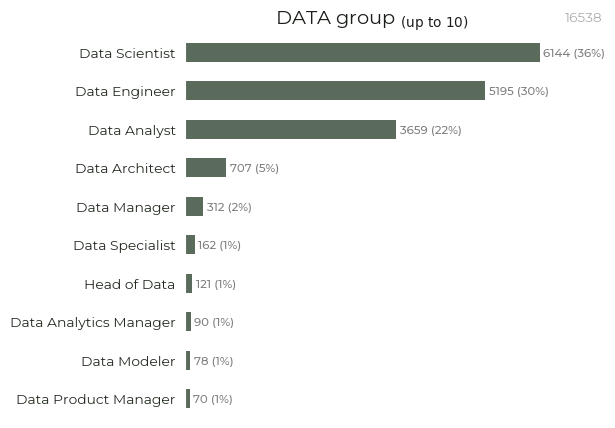

In [58]:
filtered_job_func('Data')

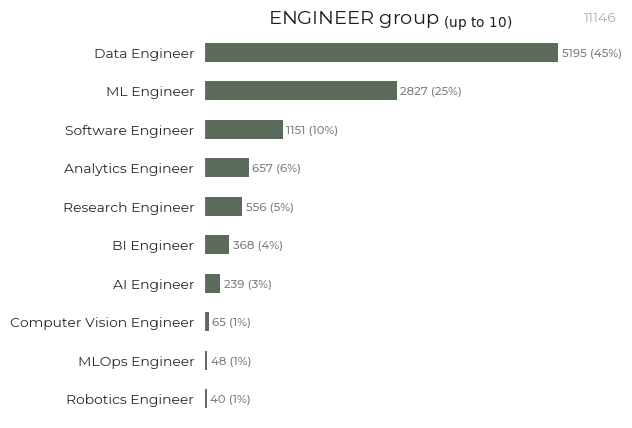

In [59]:
filtered_job_func('Engineer')

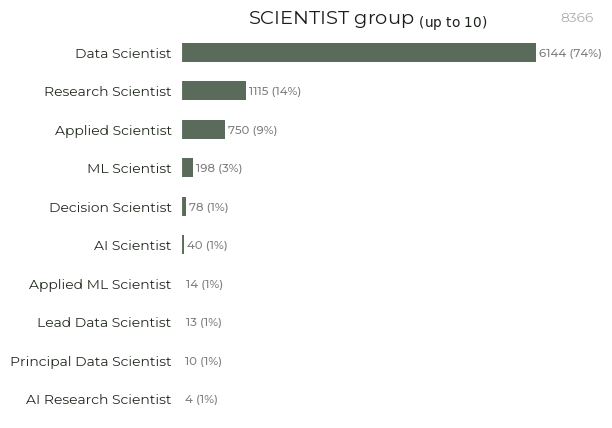

In [60]:
filtered_job_func('Scientist')

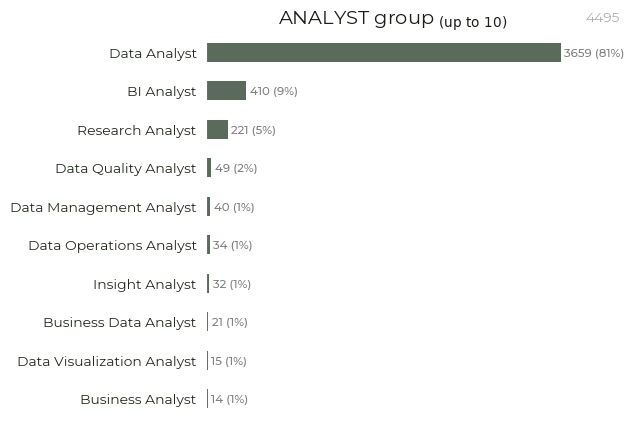

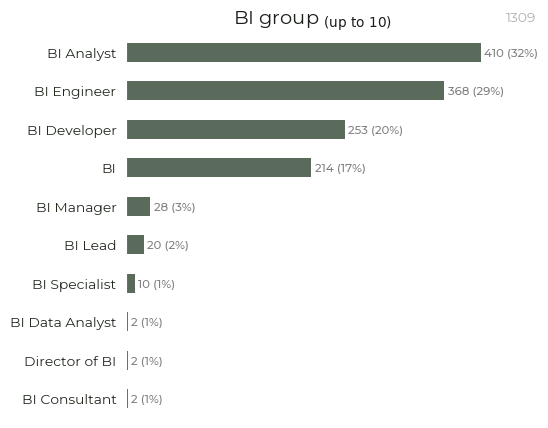

In [61]:
filtered_job_func('Analyst')
filtered_job_func('BI')

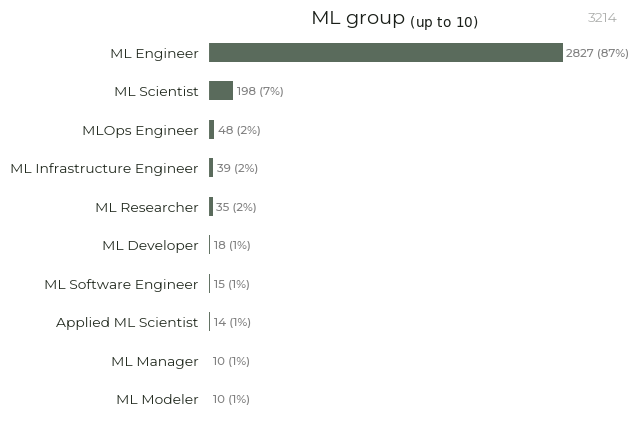

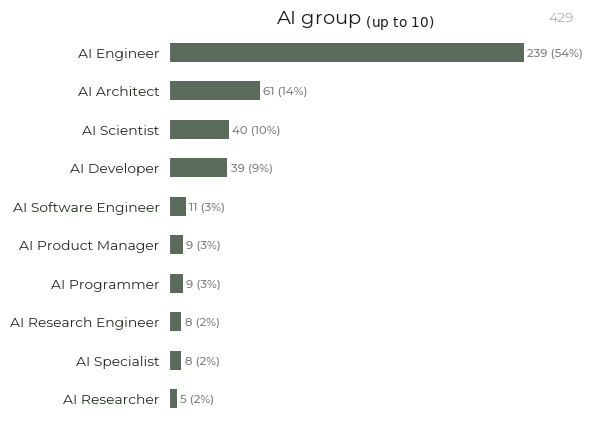

In [62]:
filtered_job_func('ML')
filtered_job_func('AI')

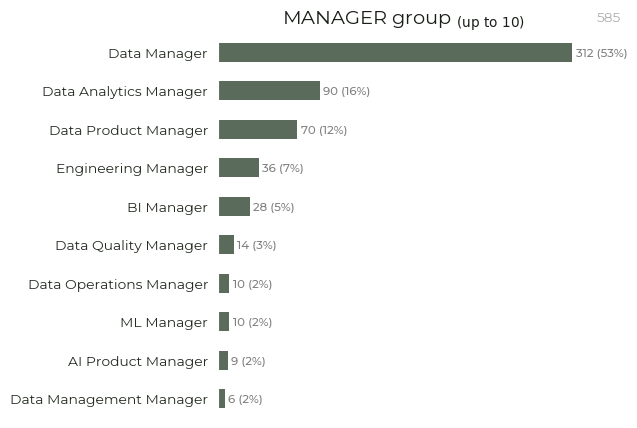

In [63]:
filtered_job_func('Manager')

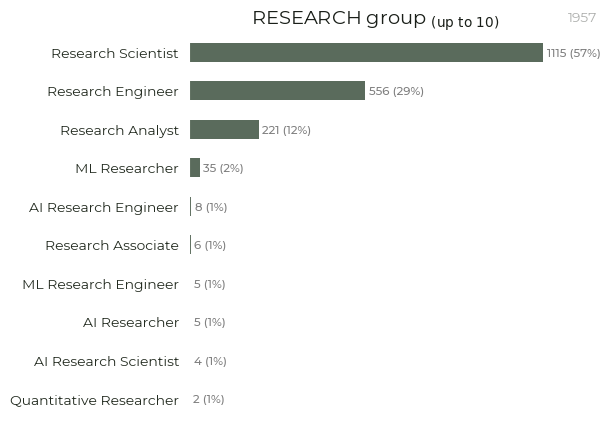

In [64]:
filtered_job_func('Research')

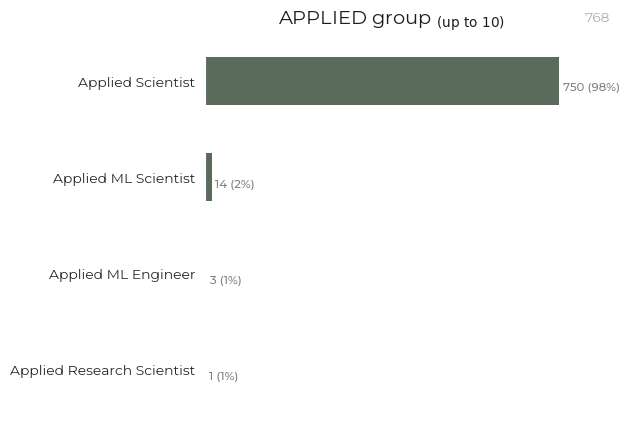

In [65]:
filtered_job_func('Applied')

## 4️⃣ Brainstorm & Goal Strategies

### a. Brainstorming based on the goals

#### Relationships
Specific relationships will be considered after the tests have been performed.

#### Salary Trends

**1. Compare overall and specific wages across years (2024 vs 2023):**  
- Overall:
  - Compare Q1, Q2, and Q3 ratios.  
  - Compare ratios of cumulative sums for each quartile range  
   (Q0-Q1 ... Q3-Q4), using samples with equal N.
  - Compare overall and sub-range standard devations.

- Specific:  
    **1 variable**:  

    - Non-working positions:  
        - Top 5 countries  
        (company location)  
        - Qualification
        - Company size


    - Working positions:
        - Top 5 most common
        - Top 5 most common by salary groups
        - Top 5 positive / negative ratios
        - Top 3 most common by group
        - Top 5 common highest-paid (>250k) / lowest-paid (<70k) job titles

    **>1 variable:**


    1. Qualification
       - Top 5 most common
       - Top 3 most common by group
    3. Company size
       - Top 5 most common
    5. Company size + qualification
       - Top 5 most common

**2. Modeling a regression model to determine the most influential variables on wages.**

#### Staff Demand

**Analyze demand for specialists across years (2024 vs 2023)**  

- Overall:

    - Top 10
    - Top 3 by group  
    (where n>30)

- Specific:

    - Qualification
    - Company size

#### Remote Work

**1. Compare trends in remote work adoption**

**2. Assess the impact of remote work type on wages**

### b. Identifying goal achievement methods

#### Relationships

**1. Analyze relationships between categorical variables**  
1. **V Cramer's Coefficient**  
Measures the strength of the association.
2. **Pearson correlation for binarized variables**  
For a clear comparison.

**2. Identify wage relationships between variables**

1. **Variance homogeneity**  
   (box-plots or Levene's test)
2. **Kruskal-Wallis Test**
3. Post-hoc: **Dunn's Test**  
   (if KW significant)

#### Salary Trends

**1. Compare overall and specific wages across years (2024 vs 2023)**

There are no specific methods. Simple data filter and output.

**2. Modeling a regression model to determine the most influential variables on wages.**  

- Use the most appropriate and efficient model.
- Use Partial Dependence Plots (PDPs)

#### Staff Demand

**Analyze demand for specialists across years (2024 vs 2023)**

There are no specific methods. Simple data filter and output.

#### Remote Work

**1. Compare trends in remote work adoption.**  

There are no specific methods. Simple data filter and output.

**2. Assess the impact of remote work type on wages.**  

There are no specific methods. Simple data filter and output.

## 5️⃣ Realization

#### ⚙️ Feature engineering 2

1. **Data build-up with frequencies ranging from 15 to 29**  
   This is to ensure that categories with frequencies below 30 are further  
   labeled as "Other" to reduce noise in the data before training the model

   The main **imbalance** in the data is observed in variables such as:  
   `job_title`, `company_location`, and `employee_residence`.
   
   **the last two categories are often identical to each other,  
   so it will be sufficient to process only one of them.*

In [66]:
# Jobs
# BETWEEN 15 AND 29 OBSERVATIONS

job_expand = ds[ds.job_title.isin(ds.job_title.value_counts().to_frame().query('count.between(15, 29)').index)]

print(job_expand.job_title.value_counts()[:10])
job_expand.sample(10)

job_title
BI Manager                       28
Data Visualization Specialist    28
DevOps Engineer                  26
Data Product Owner               26
Data Integration Specialist      25
Cloud Database Engineer          23
Business Data Analyst            21
Prompt Engineer                  21
BI Lead                          20
Data Operations Engineer         20
Name: count, dtype: int64


work_year experience_level employment_type  \
1598         24               SE              FT   
1601         24               SE              FT   
10965        24               EX              FT   
3902         24               SE              FT   
17759        23               EN              FT   
14536        24               SE              FT   
3931         24               MI              FT   
21089        23               MI              CT   
27456        21               EN              FT   
757          24               SE              FT   

                           job_title  salary salary_currency  salary_in_usd  \
1598       Site Reliability Engineer  199500             USD         199500   
1601       Site Reliability Engineer  182700             USD         182700   
10965                   NLP Engineer  150000             USD         150000   
3902      Data Visualization Analyst   97870             USD          97870   
17759  Data Visualization Specialist   82800             USD          82800   
14536                        BI Lead  104800             USD         104800   
3931              Data Product Owner  168000             USD         168000   
21089          Business Data Analyst   35000             USD          35000   
27456          Business Data Analyst   50000             EUR          59102   
757    Software Development Engineer   74800             USD          74800   

      employee_residence remote_ratio company_location company_size  \
1598                  US            0               US            M   
1601                  US            0               US            M   
10965                 US            0               US            M   
3902                  US            0               US            M   
17759                 US            0               US            M   
14536                 US          100               US            M   
3931                  US            0               US            M   
21089                 PH          100               US            M   
27456                 LU          100               LU            L   
757                   US            0               US            M   

      grouped_salary_usd  
1598             150-200  
1601             150-200  
10965            100-150  
3902              50-100  
17759             50-100  
14536            100-150  
3931             150-200  
21089               0-50  
27456             50-100  
757               50-100

In [67]:
ds = pd.concat([ds, job_expand.groupby('job_title').apply( lambda x: x.sample(30 - x.shape[0]) ).reset_index(drop=True)])

In [68]:
# Companies
# BETWEEN 15 AND 29 OBSERVATIONS

comp_location_expand = ds[ds.company_location.isin(ds.company_location.value_counts().to_frame().query('count.between(15, 29)').index)]
comp_location_expand.company_location = comp_location_expand.company_location.astype('object')

print(comp_location_expand.company_location.value_counts()[:10])
comp_location_expand.sample(10)

company_location
ZA    28
LT    28
IE    22
MX    21
IT    20
AR    19
EG    19
PL    17
LV    16
CO    16
Name: count, dtype: int64


work_year experience_level employment_type       job_title  salary  \
26973        21               MI              FT     ML Engineer   43200   
24758        23               SE              FT  Data Scientist   90000   
23663        23               SE              FT   Data Engineer   80000   
4791         24               SE              FT   Data Engineer   63000   
8249         24               SE              FT    Data Analyst  155000   
1090         24               MI              FT     BI Engineer  130000   
1288         24               SE              FT   Data Engineer  156170   
22762        23               MI              FT   Data Engineer   60000   
22604        23               EX              FT    Data Manager   72000   
16702        24               SE              FT     ML Engineer  212000   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
26973             EUR          51064                 IT           50   
24758             USD          90000                 MX          100   
23663             USD          80000                 AR          100   
4791              USD          63000                 AR          100   
8249              USD         155000                 TR            0   
1090              USD         130000                 IE          100   
1288              USD         156170                 ZA            0   
22762             USD          60000                 CO          100   
22604             USD          72000                 MX          100   
16702             USD         212000                 EG            0   

      company_location company_size grouped_salary_usd  
26973               IT            L             50-100  
24758               MX            M             50-100  
23663               AR            M             50-100  
4791                AR            M             50-100  
8249                TR            M            150-200  
1090                IE            M            100-150  
1288                ZA            M            150-200  
22762               CO            M             50-100  
22604               MX            S             50-100  
16702               EG            M            200-250

In [69]:
ds = pd.concat([ds, comp_location_expand.groupby('company_location').apply( lambda x: x.sample(30 - x.shape[0]) ).reset_index(drop=True)])

In [70]:
ds.company_location.value_counts()[5:30]

company_location
FR    78
IN    76
AU    71
NL    49
PT    33
BR    32
IE    30
LV    30
ZA    30
GR    30
TR    30
EG    30
MX    30
CO    30
AR    30
PL    30
LT    30
IT    30
NZ    14
UA    12
AT    12
EE    12
NG     9
CH     9
FI     8
Name: count, dtype: int64

In [71]:
ds.reset_index(drop=True, inplace=True)

2. **Creating features for better generalizability of data by the model**
- `company_location`
    - Continent + Its Directions (West, East...)
    - Conditional median by country
- `experience_level`, `job_title`
    - Salary above/below the median of the (qualifications + position)
- `job_title`
    - Grouping positions into their origin group
    - Is the position highly specialized?

`company_location` ⬇️

In [72]:
country_continent = {
    'CA': 'North America', 'US': 'North America', 'NL': 'Europe', 'AU': 'Australia',
    'GB': 'Europe', 'ZA': 'Africa', 'IE': 'Europe', 'TR': 'Asia',
    'IL': 'Asia', 'IN': 'Asia', 'FI': 'Europe', 'DE': 'Europe',
    'LU': 'Europe', 'KE': 'Africa', 'RS': 'Europe', 'PT': 'Europe',
    'AR': 'South America', 'GR': 'Europe', 'NZ': 'Australia', 'UA': 'Europe',
    'LT': 'Europe', 'FR': 'Europe', 'ES': 'Europe', 'SE': 'Europe',
    'MX': 'North America', 'PL': 'Europe', 'DK': 'Europe', 'LV': 'Europe',
    'AT': 'Europe', 'BR': 'South America', 'CH': 'Europe', 'AE': 'Asia',
    'SA': 'Asia', 'EG': 'Africa', 'PH': 'Asia', 'OM': 'Asia',
    'BA': 'Europe', 'IT': 'Europe', 'AS': 'Australia', 'EE': 'Europe',
    'MT': 'Europe', 'HU': 'Europe', 'LB': 'Asia', 'RO': 'Europe',
    'VN': 'Asia', 'NG': 'Africa', 'GI': 'Europe', 'CO': 'South America',
    'SI': 'Europe', 'MU': 'Africa', 'RU': 'Asia', 'KR': 'Asia',
    'CZ': 'Europe', 'QA': 'Asia', 'GH': 'Africa', 'AD': 'Europe',
    'EC': 'South America', 'NO': 'Europe', 'JP': 'Asia', 'HK': 'Asia',
    'CF': 'Africa', 'SG': 'Asia', 'TH': 'Asia', 'HR': 'Europe',
    'AM': 'Asia', 'PK': 'Asia', 'IR': 'Asia', 'BS': 'North America',
    'PR': 'North America', 'BE': 'Europe', 'ID': 'Asia', 'MY': 'Asia',
    'HN': 'North America', 'DZ': 'Africa', 'IQ': 'Asia', 'CN': 'Asia',
    'CL': 'South America', 'MD': 'Europe'
}

country_direction = {
    'CA': 'North', 'US': 'North', 'NL': 'North', 'AU': 'South',
    'GB': 'North', 'ZA': 'South', 'IE': 'North', 'TR': 'North',
    'IL': 'North', 'IN': 'North', 'FI': 'North', 'DE': 'North',
    'LU': 'North', 'KE': 'East', 'RS': 'South', 'PT': 'South',
    'AR': 'South', 'GR': 'South', 'NZ': 'South', 'UA': 'North',
    'LT': 'North', 'FR': 'North', 'ES': 'South', 'SE': 'North',
    'MX': 'North', 'PL': 'North', 'DK': 'North', 'LV': 'North',
    'AT': 'North', 'BR': 'East', 'CH': 'North', 'AE': 'East',
    'SA': 'East', 'EG': 'North', 'PH': 'East', 'OM': 'East',
    'BA': 'South', 'IT': 'South', 'AS': 'South', 'EE': 'North',
    'MT': 'South', 'HU': 'North', 'LB': 'West', 'RO': 'North',
    'VN': 'East', 'NG': 'West', 'GI': 'South', 'CO': 'North',
    'SI': 'North', 'MU': 'East', 'RU': 'North', 'KR': 'East',
    'CZ': 'North', 'QA': 'East', 'GH': 'West', 'AD': 'North',
    'EC': 'West', 'NO': 'North', 'JP': 'East', 'HK': 'East',
    'CF': 'North', 'SG': 'South', 'TH': 'East', 'HR': 'South',
    'AM': 'West', 'PK': 'West', 'IR': 'West', 'BS': 'North',
    'PR': 'East', 'BE': 'North', 'ID': 'South', 'MY': 'South',
    'HN': 'North', 'DZ': 'North', 'IQ': 'North', 'CN': 'East',
    'CL': 'West', 'MD': 'North'
}

In [73]:
ds['country_continent'] = ds.company_location.map(country_continent)
ds['country_direction'] = ds.company_location.map(country_direction)

In [74]:
country_median = ds.groupby('company_location').salary_in_usd.agg(['median', 'count'])
country_median['by_condition'] = pd.cut(country_median['median'], 
                                        bins=[0, 30_000, 60_000, 90_000, 120_000, np.inf],
                                        labels=['<30k', '30-60k', '60-90k', '90-120k', '>120k'], 
                                        include_lowest=True  )

country_median['by_condition'] = country_median.apply(lambda x: '(n<30)' if x['count'] < 30 else x['by_condition'], axis=1)
ds['country_median'] = ds.company_location.map(country_median.by_condition.to_dict())

In [75]:
ds.groupby(['country_continent', 'country_direction']).country_median.value_counts().to_frame()

count
country_continent country_direction country_median       
Africa            East              (n<30)              5
                  North             >120k              30
                                    (n<30)              4
                  South             30-60k             30
                  West              (n<30)             12
Asia              East              (n<30)             40
                  North             30-60k             76
                                    <30k               30
                                    (n<30)             16
                  South             (n<30)              8
                  West              (n<30)              8
Australia         South             90-120k            71
                                    (n<30)             18
Europe            North             60-90k           1246
                                    (n<30)             92
                                    30-60k             60
                                    90-120k            30
                  South             30-60k            200
                                    60-90k             30
                                    (n<30)             13
North America     East              (n<30)              4
                  North             >120k           25669
                                    60-90k             30
                                    (n<30)              2
South America     East              30-60k             32
                  North             60-90k             30
                  South             60-90k             30
                  West              (n<30)              4

`experience_level`, `job_title` ⬇️

In [76]:
above_below = []
for job, exp, sal in zip(ds.job_title, ds.experience_level, ds.salary_in_usd):
    comb = ds.query('(job_title == @job) & (experience_level == @exp)')

    if comb.shape[0] > 15:
        if sal < comb.salary_in_usd.median():
            above_below.append('Below')
        else:
            above_below.append('Above')
    else:
        above_below.append('(n<15)')

ds['jobexp_median'] = above_below

In [78]:
ds.jobexp_median.sample(5)

10259    Below
10836    Below
17152    Below
24375    Below
11684    Below
Name: jobexp_median, dtype: object

`job_title` ⬇️

In [79]:
general_positions = [
    'Engineer', 'Analyst', 'Scientist', 'Manager', 
    'Architect', 'Developer', 'Specialist', 'Consultant', 
    'Programmer', 'Head', 'Director'
]

pattern = r'\b(' + '|'.join(general_positions) + r')\b'

def origin_group(row):
    if pd.Series(row.split()).str.contains(pattern).any():
        return pd.Series(row.split()).str.extract(f'({pattern})')[0].dropna().str.cat(sep=' | ')
    else:
        return 'Specialized'

ds['origin_group'] = ds.job_title.apply(origin_group)

In [80]:
ds.origin_group.value_counts()

origin_group
Engineer                 11817
Scientist                 8406
Analyst                   4605
Architect                  809
Manager                    598
Specialized                578
Developer                  449
Specialist                 347
Head                       138
Programmer                  51
Consultant                  20
Consultant | Engineer        2
Director                     2
Name: count, dtype: int64

In [81]:
ds.origin_group.replace('Consultant | Engineer', 'Engineer', inplace=True)

In [82]:
specialized_positions = [
    'AI', 'Analytics', 'Applied', 'BI', 
    'Big', 'Cloud', 'Computer Vision', 'DevOps', 
    'Integration', 'Management', 'Operations', 
    'Product', 'Quality', 'Visualization', 'Deep Learning'
    'ETL', 'Lead', 'ML', 'MLOps', 'Marketing', 'NLP',
    'Principal', 'Research', 'Staff'
]

pattern = r'\b(' + '|'.join(specialized_positions) + r')\b'

def origin_group(row):
    if pd.Series(row.split()).str.contains(pattern).any():
        return pd.Series(row.split()).str.extract(f'({pattern})')[0].dropna().str.cat(sep=' | ')
    else:
        return 'Unique / Origin'

ds['specialization'] = ds.job_title.apply(origin_group)

In [83]:
ds.specialization.replace({'Analytics | Lead': 'Lead',
                           'BI | Lead': 'Lead',
                           'Lead | AI': 'Lead',
                           'Lead | ML': 'Lead',
                           'Staff | ML': 'ML',
                           'ML | Quality': 'ML',
                           'Principal | ML': 'ML',
                           'ML | Research': 'ML',
                           'AI | Research': 'AI',
                           'Applied | ML': 'ML',
                           'AI | Product': 'AI',
                           'Applied | Research': 'Applied'},
                            inplace=True)

In [84]:
spec_n15_index = ds.specialization.value_counts().to_frame().query('count < 15').index
ds.specialization.replace(spec_n15_index, 'Unique / Origin', inplace=True)

In [85]:
ds.specialization.value_counts()

specialization
Unique / Origin    18467
ML                  3252
Research            1902
BI                  1300
Analytics            795
Applied              753
AI                   446
Lead                 143
Operations           114
Product              106
Management           100
Quality               96
Visualization         76
Integration           76
MLOps                 48
Cloud                 39
DevOps                33
NLP                   33
Principal             28
Big                   15
Name: count, dtype: int64

Groups with number of observations <30 will be labeled as 'Other'.  
⬇️ This will reduce (a) **noise** and (b) **stretched imbalance** in the variables.

In [86]:
empl_cntry_n30_index = ds.employee_residence.value_counts().to_frame().query('count < 30').index
comp_cntry_n30_index = ds.company_location.value_counts().to_frame().query('count < 30').index
ds.employee_residence.replace(empl_cntry_n30_index, 'Other', inplace=True)
ds.company_location.replace(comp_cntry_n30_index, 'Other', inplace=True)

In [87]:
sal_curr_n30_index = ds.salary_currency.value_counts().to_frame().query('count < 30').index
ds.salary_currency.replace(sal_curr_n30_index, 'Other', inplace=True)

In [88]:
job_n30_index = ds.job_title.value_counts().to_frame().query('count < 30').index
ds.job_title.replace(job_n30_index, 'Other', inplace=True)

In [89]:
new_column_order = ['work_year', 'origin_group', 'specialization', 'job_title', 
                    'experience_level', 'company_size', 'employment_type', 'remote_ratio',
                    'employee_residence', 'company_location', 'country_continent',
                    'country_direction', 'country_median', 'jobexp_median', 'salary_currency', 
                    'salary', 'salary_in_usd', 'grouped_salary_usd']

ds = ds[new_column_order]

In [90]:
ds[ds.select_dtypes(exclude=['number']).columns] = ds.select_dtypes(exclude=['number']).astype('category')
ds['job_title'] = ds.job_title.astype('object')

In [91]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27822 entries, 0 to 27821
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           27822 non-null  category
 1   origin_group        27822 non-null  category
 2   specialization      27822 non-null  category
 3   job_title           27822 non-null  object  
 4   experience_level    27822 non-null  category
 5   company_size        27822 non-null  category
 6   employment_type     27822 non-null  category
 7   remote_ratio        27822 non-null  category
 8   employee_residence  27822 non-null  category
 9   company_location    27822 non-null  category
 10  country_continent   27820 non-null  category
 11  country_direction   27820 non-null  category
 12  country_median      27822 non-null  category
 13  jobexp_median       27822 non-null  category
 14  salary_currency     27822 non-null  category
 15  salary              27822 non-null  

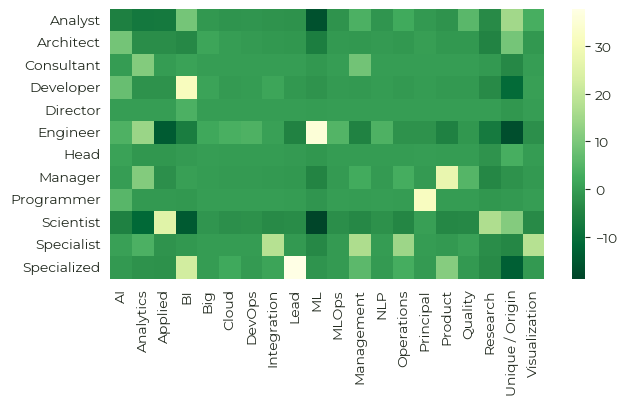

In [92]:
corr = pd.get_dummies(ds[['specialization', 'origin_group']]).corr() * 100
corr = corr.loc[:, corr.columns.str.contains('specialization')]
corr = corr.loc[~corr.index.isin(corr.columns)]

plt.figure(figsize=[7, 3.5])
ax = sns.heatmap(corr, cmap='YlGn_r', annot=False, fmt='.0f')

ax.set_xticklabels([name.get_text().split('specialization_')[1] for name in ax.get_xticklabels()])
ax.set_yticklabels([name.get_text().split('origin_group_')[1] for name in ax.get_yticklabels()])

ax.figure.savefig('feature_eng1', dpi=300, bbox_inches='tight')

plt.show()

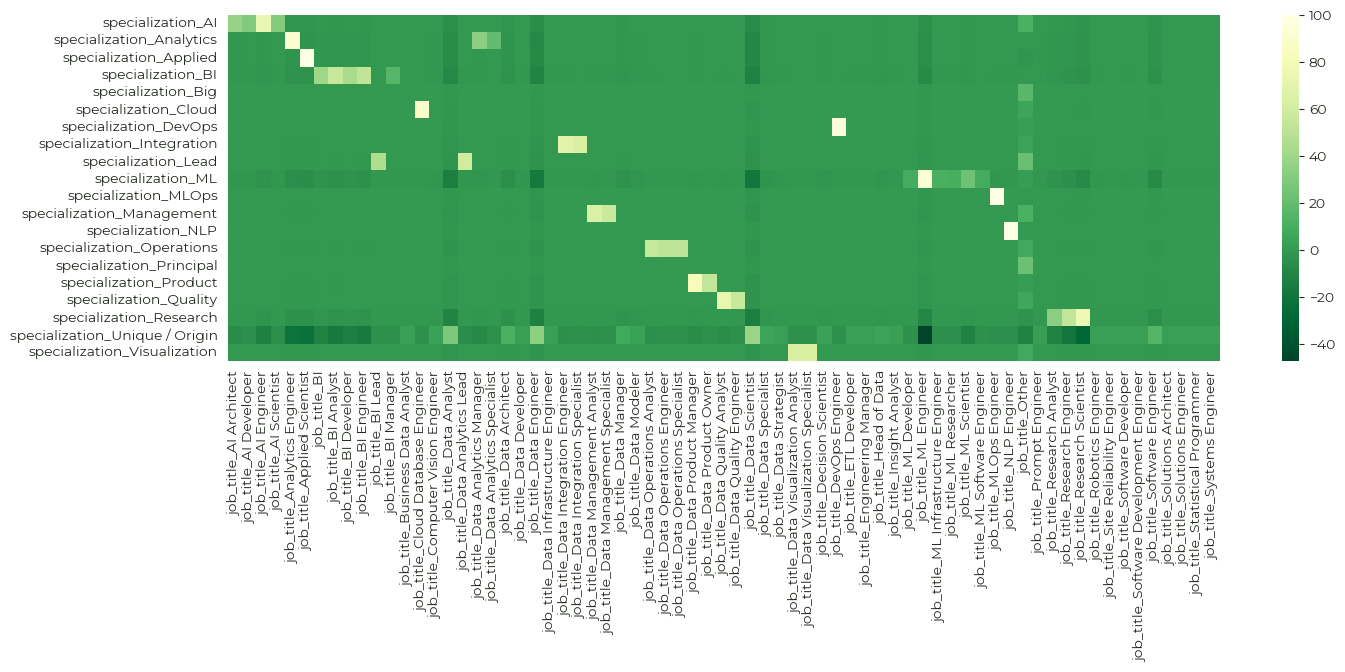

In [93]:
corr = pd.get_dummies(ds[['job_title', 'specialization']]).corr() * 100
corr = corr.loc[:, corr.columns.str.contains('job_title')]
corr = corr.loc[~corr.index.isin(corr.columns)]

plt.figure(figsize=[16, 4.5])
sns.heatmap(corr, cmap='YlGn_r', annot=False, fmt='.0f')
plt.show()

In [94]:
"o_s_apola".split('o_s_')[1]

'apola'

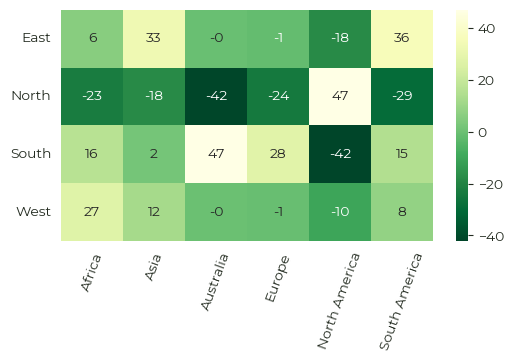

In [95]:
corr = pd.get_dummies(ds[['country_continent', 'country_direction']]).corr() * 100
corr = corr.loc[:, corr.columns.str.contains('country_continent')]
corr = corr.loc[~corr.index.isin(corr.columns)]

plt.figure(figsize=[6, 3])
ax = sns.heatmap(corr, cmap='YlGn_r', annot=True, fmt='.0f')

ax.set_xticklabels([name.get_text().split('country_continent_')[1] for name in ax.get_xticklabels()], rotation=70)
ax.set_yticklabels([name.get_text().split('country_direction_')[1] for name in ax.get_yticklabels()])

ax.figure.savefig('feature_eng1', dpi=300, bbox_inches='tight')

plt.show()

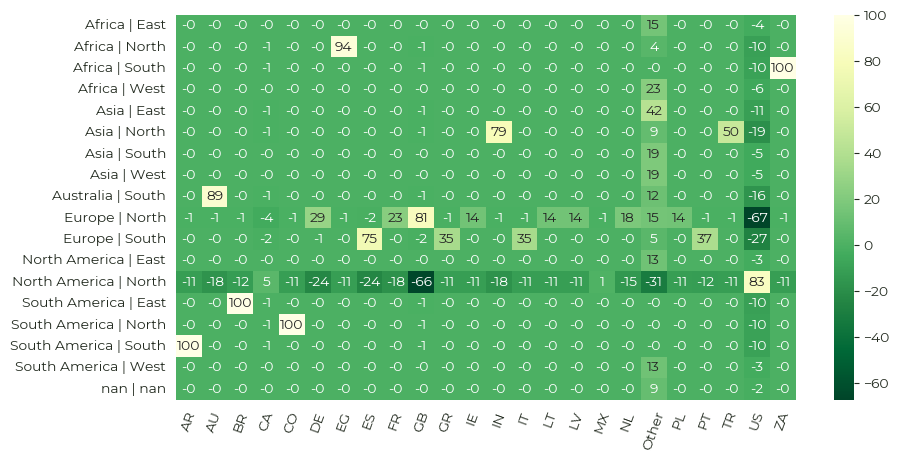

In [96]:
ds['cont_direct'] = ds.country_continent.astype('str') + ' | ' + ds.country_direction.astype('str')

corr = pd.get_dummies(ds[['company_location', 'cont_direct']]).corr() * 100
corr = corr.loc[:, corr.columns.str.contains('company_location')]
corr = corr.loc[~corr.index.isin(corr.columns)]

plt.figure(figsize=[10, 5])
ax = sns.heatmap(corr, cmap='YlGn_r', annot=True, fmt='.0f')

ax.set_xticklabels([name.get_text().split('company_location_')[1] for name in ax.get_xticklabels()], rotation=70)
ax.set_yticklabels([name.get_text().split('cont_direct_')[1] for name in ax.get_yticklabels()])

ax.figure.savefig('feature_eng1', dpi=300, bbox_inches='tight')

plt.show()

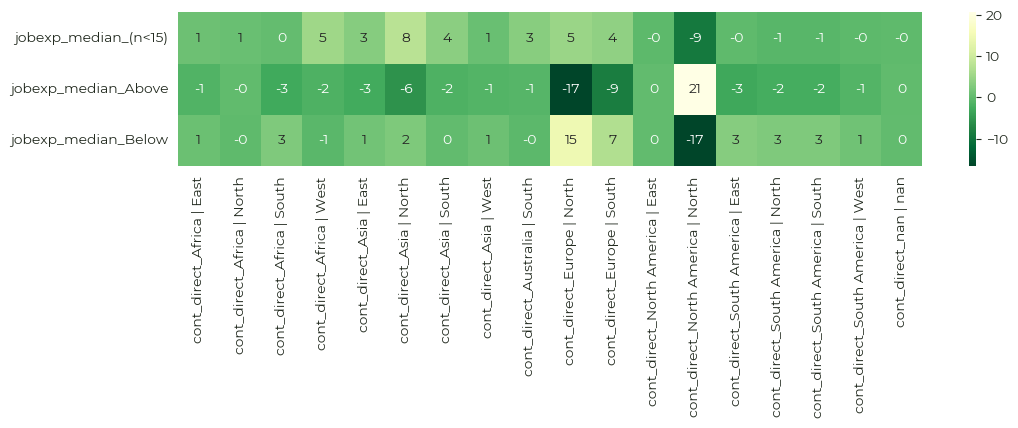

In [97]:
corr = pd.get_dummies(ds[['cont_direct', 'jobexp_median']]).corr() * 100
corr = corr.loc[:, corr.columns.str.contains('cont_direct')]
corr = corr.loc[~corr.index.isin(corr.columns)]

plt.figure(figsize=[12, 2])
sns.heatmap(corr, cmap='YlGn_r', annot=True, fmt='.0f')
plt.show()

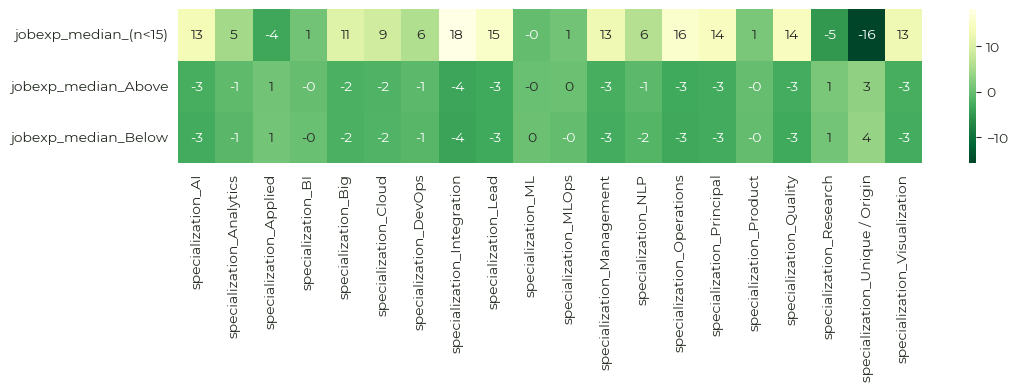

In [98]:
corr = pd.get_dummies(ds[['specialization', 'jobexp_median']]).corr() * 100
corr = corr.loc[:, corr.columns.str.contains('specialization')]
corr = corr.loc[~corr.index.isin(corr.columns)]

plt.figure(figsize=[12, 2])
sns.heatmap(corr, cmap='YlGn_r', annot=True, fmt='.0f')
plt.show()

In [99]:
ds.groupby(['country_continent']).origin_group.value_counts(normalize=True).to_frame().loc['North America'].round(2)

proportion
origin_group            
Engineer            0.43
Scientist           0.30
Analyst             0.16
Architect           0.03
Manager             0.02
Specialized         0.02
Developer           0.02
Specialist          0.01
Head                0.00
Programmer          0.00
Consultant          0.00
Director            0.00

In [100]:
ds.groupby('country_continent').jobexp_median.value_counts(normalize=True).to_frame().round(2)

proportion
country_continent jobexp_median            
Africa            Below                0.60
                  Above                0.23
                  (n<15)               0.16
Asia              Below                0.65
                  (n<15)               0.28
                  Above                0.07
Australia         Below                0.43
                  Above                0.40
                  (n<15)               0.17
Europe            Below                0.79
                  Above                0.11
                  (n<15)               0.10
North America     Above                0.51
                  Below                0.44
                  (n<15)               0.04
South America     Below                0.90
                  Above                0.09
                  (n<15)               0.01

### 🔀 Relationships

#### 1. Analyze relationships between categorical variables

In [101]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27822 entries, 0 to 27821
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           27822 non-null  category
 1   origin_group        27822 non-null  category
 2   specialization      27822 non-null  category
 3   job_title           27822 non-null  object  
 4   experience_level    27822 non-null  category
 5   company_size        27822 non-null  category
 6   employment_type     27822 non-null  category
 7   remote_ratio        27822 non-null  category
 8   employee_residence  27822 non-null  category
 9   company_location    27822 non-null  category
 10  country_continent   27820 non-null  category
 11  country_direction   27820 non-null  category
 12  country_median      27822 non-null  category
 13  jobexp_median       27822 non-null  category
 14  salary_currency     27822 non-null  category
 15  salary              27822 non-null  

In [102]:
ds_category = ds.select_dtypes(include=['category'])

In [132]:
ds_category_old = ds_category[['experience_level', 'company_size', 'employment_type', 
                               'remote_ratio', 'employee_residence', 'company_location', 
                               'grouped_salary_usd', 'work_year']]

In [133]:
results = []

for x in ds_category_old.columns:
    for y in ds_category_old.columns[ds_category_old.columns != x]:
        contingency_table = pd.crosstab(ds_category_old[x], ds_category_old[y])
        cramer_v = stats.contingency.association(contingency_table, method='cramer')

        result = {
            'xx': x,
            'xy': y,
            'cramerv': f'{cramer_v:.2f}'
        }
        results.append(result)

In [134]:
relation_test = pd.DataFrame(results)
relation_test.set_index(['xx', 'xy'], inplace=True)

relation_test[:15]

cramerv
xx               xy                        
experience_level company_size          0.06
                 employment_type       0.05
                 remote_ratio          0.08
                 employee_residence    0.09
                 company_location      0.09
                 grouped_salary_usd    0.24
                 work_year             0.10
company_size     experience_level      0.06
                 employment_type       0.13
                 remote_ratio          0.23
                 employee_residence    0.27
                 company_location      0.26
                 grouped_salary_usd    0.12
                 work_year             0.28
employment_type  experience_level      0.05

In [135]:
encoded_ds_category = pd.get_dummies(ds_category) * 1
correlation_matrix = encoded_ds_category.corr()

In [136]:
column_mapping = {col: [str(col) + '_' + str(i) for i in ds_category_old[f'{col}'].unique()] for col in ds_category_old.columns}

def corr_matrix(xx:str, xy:str):
    
    x = column_mapping[xx]
    y = column_mapping[xy]

    salary_order = ['grouped_salary_usd_' + i for i in ds.grouped_salary_usd.unique().sort_values().to_list()]
    if xx == 'grouped_salary_usd':
        x = salary_order
    if xy == 'grouped_salary_usd':
        y = salary_order
        
    filtered_matrix = correlation_matrix.loc[x, y]

    filtered_matrix.index = [s.split('_')[-1] for s in x]
    filtered_matrix.columns = [s.split('_')[-1] for s in y]

    return filtered_matrix

In [152]:
def heatmap(x:str, y_list:list, figsize=[16, 8], wspace=0.3, hspace=0.35, cmap='YlGn_r'):
    
    fig_row = 2
    fig_col = round( len(y_list) / 2 )

    cramerv_mean = (relation_test.loc[x].loc[y_list].astype('float').sum() / len(y_list))[0]
    
    if cramerv_mean <= 0.3:
        strength = 'weak' 
    elif cramerv_mean > 0.3 and cramerv_mean <= 0.5:
        strength = 'moderate'
    elif cramerv_mean > 0.5 and cramerv_mean <= 0.7:
        strength = 'strong'
    else:
        strength = 'very strong'
    
    fig, axes = plt.subplots(fig_row, fig_col, figsize=figsize)
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    fig.suptitle(x.replace('_', ' ').capitalize(), size=23, y=1.015)
    fig.text(x=0.5, y=0.955, s=f'cramer_v mean – {round(cramerv_mean, 2)} ({strength})', size=13, alpha=0.6, ha='center')

    coords = []
    for row in range(fig_row):
        for col in range(fig_col):
            coords.append((row, col))
        
    for y, coord in zip(y_list, coords):
                
        if len(column_mapping[y]) > 10 or len(column_mapping[x]) > 10:
            annot=False 
        else: 
            annot=True

        cramerv = relation_test.loc[x, y][0]
        
        sns.heatmap(corr_matrix(y, x), cmap=cmap, cbar=False, annot=annot, fmt='.2f', ax=axes[coord])
        axes[coord].set_title(y.replace('_', ' ') + f' ({cramerv} cv)', alpha=0.7, pad=10)

    fig.figure.savefig(f'relation_{x}', dpi=300, bbox_inches='tight')
    
    plt.show()

In [153]:
def y_list(x:str):

    if x == 'salary_currency':
        salary_filter = ''
    else:
        salary_filter = 'salary_currency'
        
    y_list = []
    for y in ds_category_old.columns[(ds_category_old.columns != x) & (ds_category_old.columns != salary_filter)]:
        y_list.append(y)

    return y_list

In [154]:
ds_remote_empltype = (ds['employment_type'].astype(str) + '|' + ds['remote_ratio'].astype(str)).astype('category')

In [155]:
ds_for_rem = ds.select_dtypes(include=['category']).copy()
ds_for_rem['remote_empltype'] = ds_remote_empltype

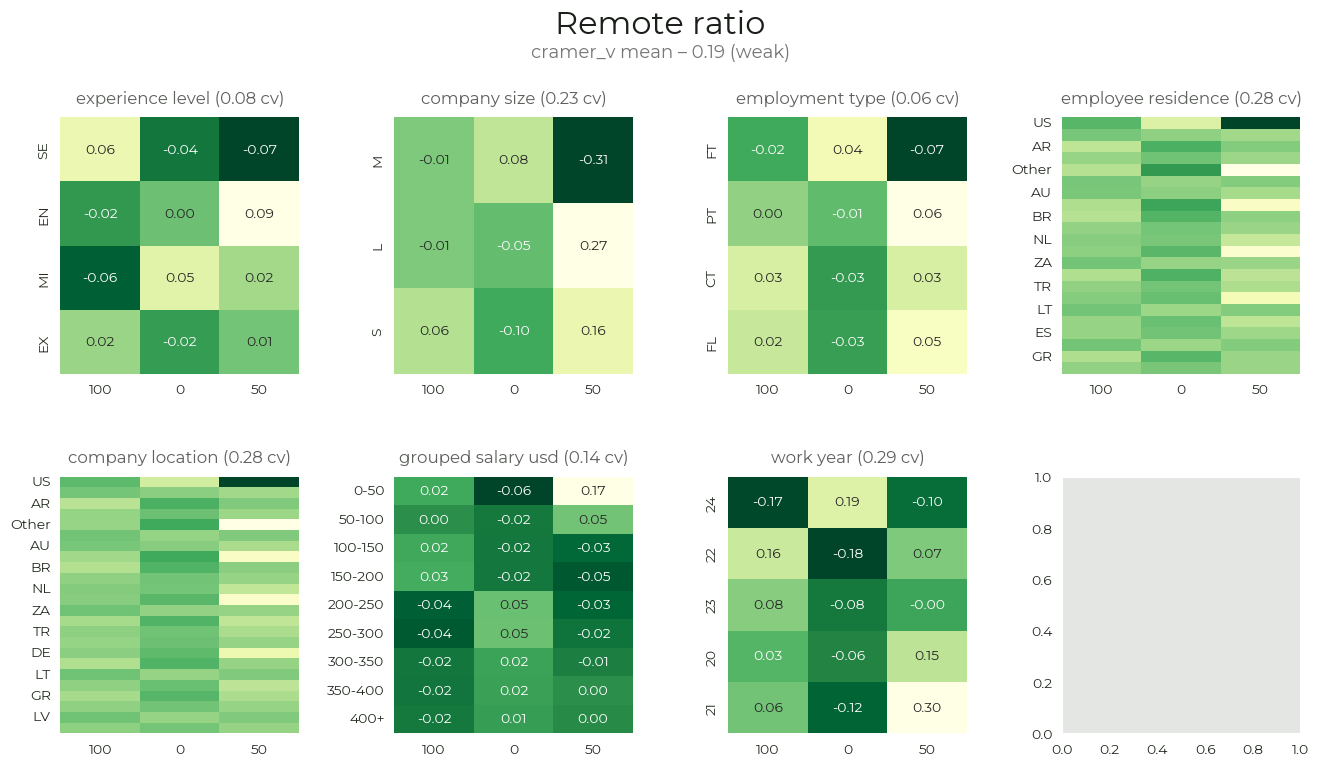

In [157]:
heatmap('remote_ratio', y_list('remote_ratio'), hspace=0.4, wspace=0.4)

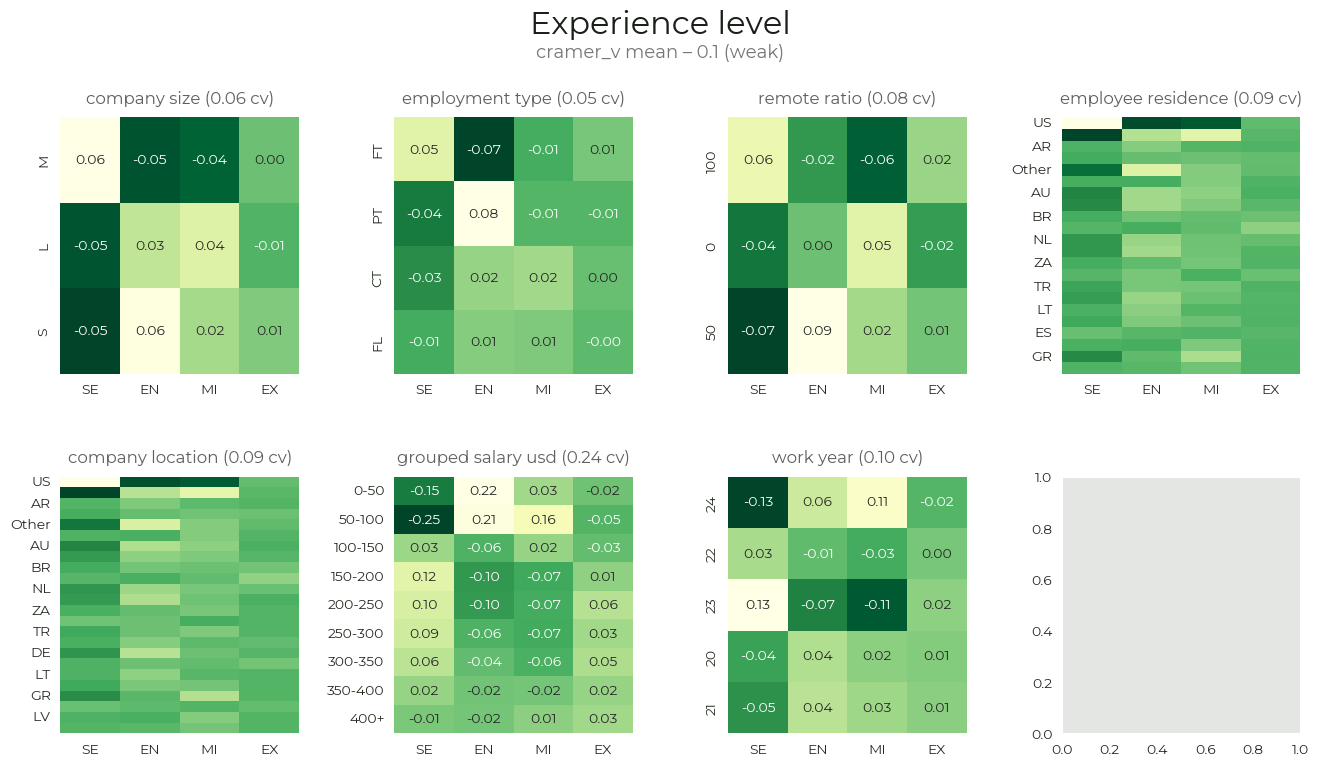

In [158]:
heatmap('experience_level', y_list('experience_level'), hspace=0.4, wspace=0.4)

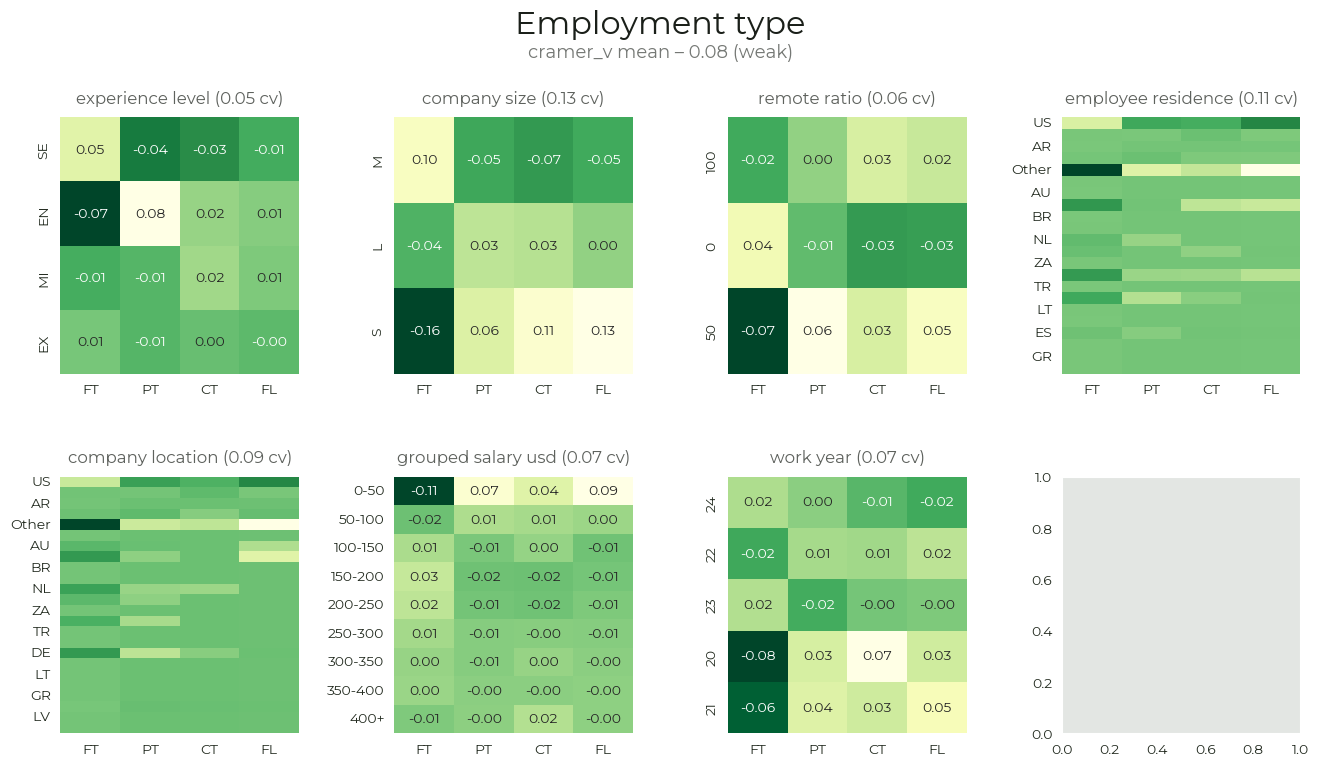

In [159]:
heatmap('employment_type', y_list('employment_type'), hspace=0.4, wspace=0.4)

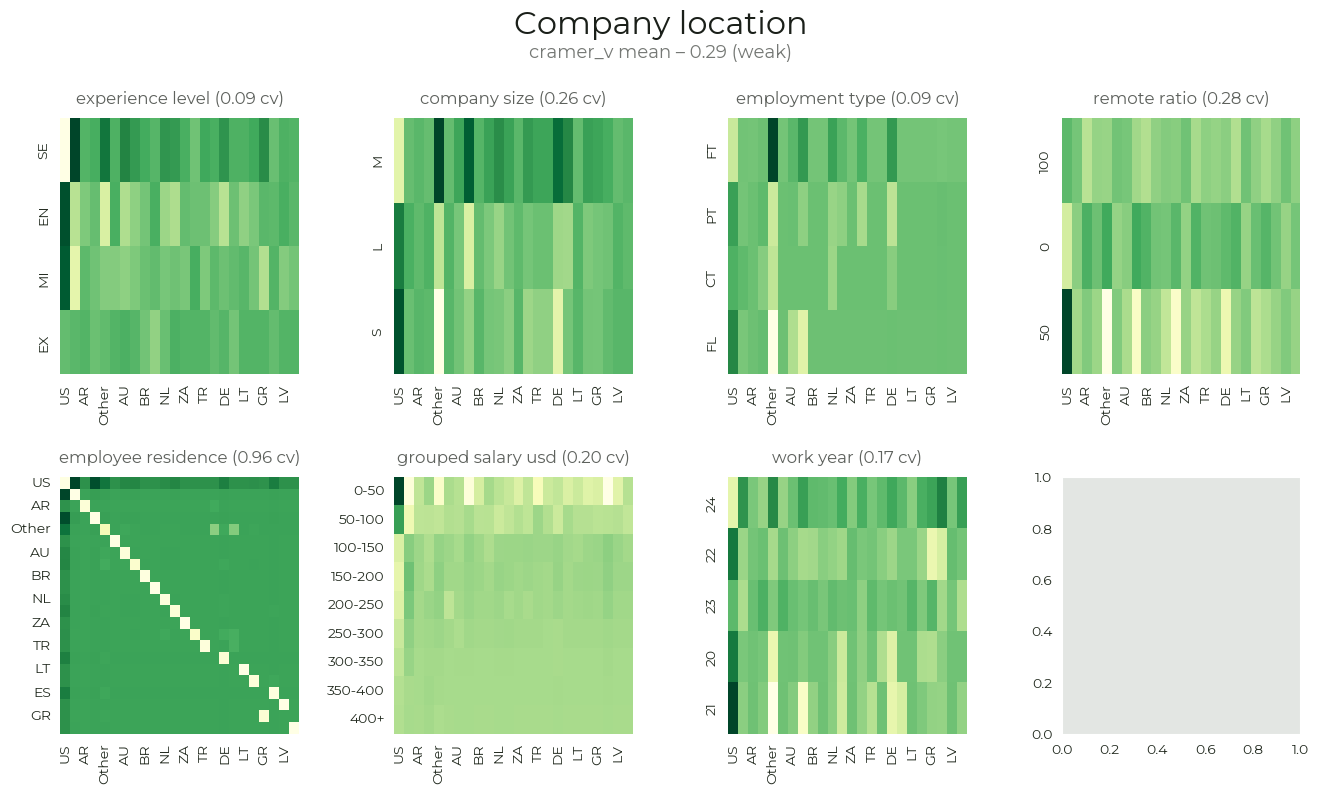

In [161]:
heatmap('company_location', y_list('company_location'), hspace=0.4, wspace=0.4)

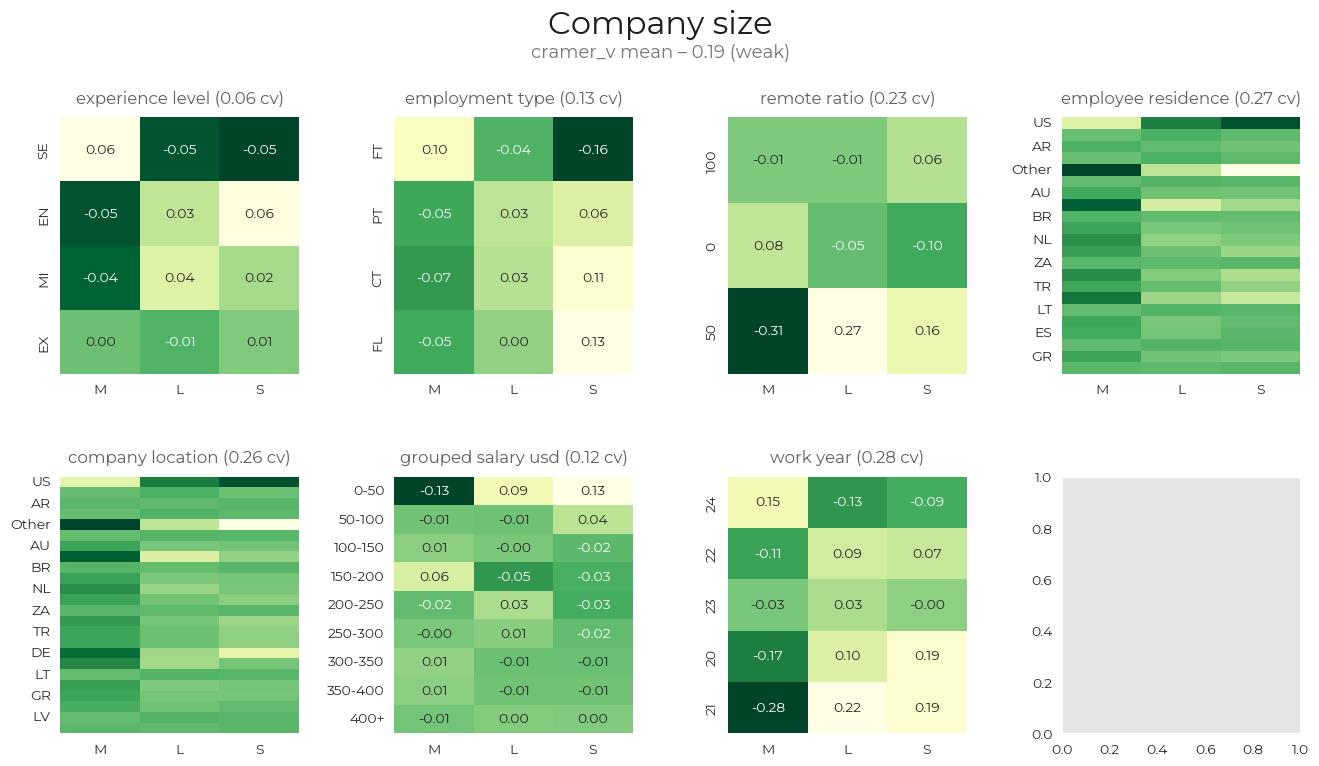

In [162]:
heatmap('company_size', y_list('company_size'), hspace=0.4, wspace=0.4)

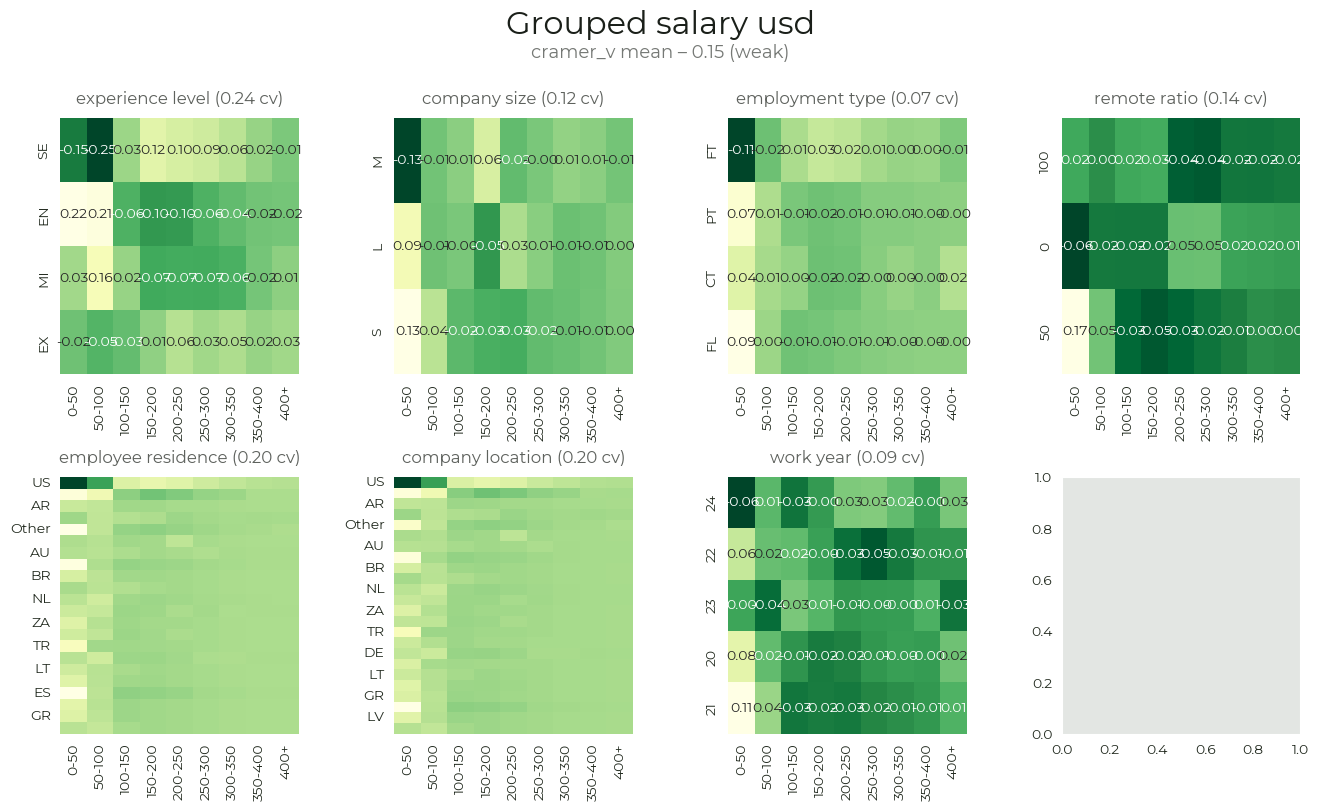

In [163]:
heatmap('grouped_salary_usd', y_list('grouped_salary_usd'), hspace=0.4, wspace=0.4)

#### 2. Identify wage relationships between variables

Homoscedasticity test for skewed data  
**Levene's Test:**  

In [164]:
groups_n30 = {}

print("P-value by Levene:\n   (if n > 30)\n")

for column in ds_category.columns:
    groups = ds.groupby(column, sort=False)['salary_in_usd']
    names = [name for name, group in groups if group.count() > 29]
    groups = [group.sample(n=100, random_state=1, replace=True) for name, group in groups if group.count() > 29]

    groups_n30[column] = names
    
    statistic_lev, p_value_lev = stats.levene(*groups)

    print(f'{p_value_lev:.3f} – {column} ({len(groups)}/{ds[column].nunique()})')
    if p_value_lev > 0.05:
        print('  Skewness:', ds[ds[column].isin(groups_n30[column])].groupby(column).salary_in_usd.skew().dropna().round(2).to_list())

P-value by Levene:
   (if n > 30)

0.209 – work_year (5/5)
  Skewness: [2.34, 1.51, 0.53, 0.61, 0.84]
0.000 – origin_group (10/12)
0.000 – specialization (18/20)
0.008 – experience_level (4/4)
0.011 – company_size (3/3)
0.113 – employment_type (3/4)
  Skewness: [2.2, 0.77, 1.44]
0.595 – remote_ratio (3/3)
  Skewness: [0.8, 2.48, 0.64]
0.000 – employee_residence (22/22)
0.000 – company_location (24/24)
0.000 – country_continent (6/6)
0.000 – country_direction (3/4)
0.000 – country_median (6/6)
0.000 – jobexp_median (3/3)
0.000 – salary_currency (6/6)
0.000 – grouped_salary_usd (9/9)


**Kruskal-Wallis Test:**

In [165]:
kw_pvalues = {}
kw_groups = {}

print("P-value by Kruskal-Wallis:\n      (if n > 30)\n")

for column in ds_category.columns:
    groups = ds.groupby(column, sort=False)['salary_in_usd']
    groups = [group.sample(n=100, random_state=1, replace=True) for name, group in groups if group.count() > 29]
    
    statistic_kr, p_value_kr = stats.kruskal(*groups)
    kw_pvalues[column] = p_value_kr
    kw_groups[column] = groups

    print(f'{p_value_kr:.3f} – {column} ({len(groups)}/{ds[column].nunique()})')

P-value by Kruskal-Wallis:
      (if n > 30)

0.000 – work_year (5/5)
0.000 – origin_group (10/12)
0.000 – specialization (18/20)
0.000 – experience_level (4/4)
0.000 – company_size (3/3)
0.000 – employment_type (3/4)
0.000 – remote_ratio (3/3)
0.000 – employee_residence (22/22)
0.000 – company_location (24/24)
0.000 – country_continent (6/6)
0.000 – country_direction (3/4)
0.000 – country_median (6/6)
0.000 – jobexp_median (3/3)
0.000 – salary_currency (6/6)
0.000 – grouped_salary_usd (9/9)


**Post-hoc: Dunn's Test:**

In [166]:
import scikit_posthocs as phoc

dunn_dict = {}
for column in ds_category.columns: 
    if kw_pvalues[column] < 0.05:
        
        replace = {}
        for n, name in enumerate(groups_n30[column], start=1):
            replace[n] = name
            
        posthoc_dunn = phoc.posthoc_dunn(kw_groups[column], p_adjust='holm-sidak', sort=False)
        posthoc_dunn.rename(columns=replace, index=replace, inplace=True)

        dunn_dict[column] = posthoc_dunn
    else:
        print(column + ' p-value > 0.05')

In [167]:
dunn_dict['specialization'].round(4).style.background_gradient()

In [378]:
dunn_dict['origin_group'].round(4).style.background_gradient()

### 💰 Salary Trends

#### 1. Compare overall and specific wages 💰 across years (2024 vs 2023)

##### 🔷 **Overall**:  

🔸 Compare Q1, Q2, and Q3 ratios.  

In [168]:
year_quants = {}

for year in ['23', '24']:
    yq = [ds[ds.work_year == year].salary_in_usd.quantile(quantile) for quantile in [0.25, 0.5, 0.75]]
    year_quants[year] = yq

In [169]:
quarts = pd.DataFrame([ year_quants['23'], year_quants['24'] ], index=['2023', '2024'], columns=['Q1', 'Q2', 'Q3']).T
quarts['Ratios (%)'] = round((quarts['2023'] / quarts['2024'] - 1) * 100, 1)
quarts[['2023', '2024']] = quarts.iloc[:, :2].astype('int')

In [170]:
quarts.astype('str').style.background_gradient(subset=['2023', '2024'], cmap='Blues', axis=1).background_gradient(subset='Ratios (%)', cmap='Blues')

🔸 Compare ratios of means for each quartile range  
    (Q0-Q1 ... Q3-Q4), using samples with equal N.  

In [171]:
def bootstrap(sample, agg='mean', n_bootstrap=100, n_sample=1000, replace=False):
    true_value = []
    if agg == 'mean':
        for i in range(n_bootstrap):
            true_value.append( pd.Series(sample.salary_in_usd.sample(n_sample, replace=replace)).mean() )
    elif agg == 'median':
        for i in range(n_bootstrap):
            true_value.append( pd.Series(sample.salary_in_usd.sample(n_sample, replace=replace)).median() )
    elif agg == 'var':
        for i in range(n_bootstrap):
            true_value.append( pd.Series(sample.salary_in_usd.sample(n_sample, replace=replace)).var() )
    elif agg == 'std':
        for i in range(n_bootstrap):
            true_value.append( pd.Series(sample.salary_in_usd.sample(n_sample, replace=replace)).std() )
    else: 
        for i in range(n_bootstrap):
            true_value.append( pd.Series(sample.salary_in_usd.sample(n_sample, replace=replace)) )
    
    return true_value

comparing_mean = {}

quant_list = [0, 0.25, 0.5, 0.75, 1]

for year in ['23', '24']:
    comparing_mean[year] = []
    
    for q in range(len(quant_list) - 1):
        q1 = ds[ds.work_year == year].salary_in_usd.quantile(quant_list[q])
        q2 = ds[ds.work_year == year].salary_in_usd.quantile(quant_list[q + 1])

        salary_range = ds[ ds.work_year == year ][ ds[ds.work_year == year].salary_in_usd.between(q1, q2) ]
        
        comparing_mean[year].append( pd.Series(bootstrap(salary_range)).mean() )

In [172]:
ranges_mean = pd.DataFrame([ comparing_mean['23'], comparing_mean['24'] ], index=['2023', '2024'], columns=['Q0-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-Q4']).T
ranges_mean['Ratios (%)'] = round((ranges_mean['2023'] / ranges_mean['2024'] - 1) * 100, 1)
ranges_mean[['2023', '2024']] = ranges_mean.iloc[:, :2].astype('int')

In [173]:
ranges_mean.astype('str').style.background_gradient(subset=['2023', '2024'], cmap='Blues', axis=1).background_gradient(subset='Ratios (%)', cmap='Blues')

🔸 Compare overall and sub-range standard devations.

In [174]:
mean_std_23 = pd.Series(bootstrap(sample=ds[ds.work_year == '23'], agg='std', n_sample=5000)).mean()
mean_std_24 = pd.Series(bootstrap(sample=ds[ds.work_year == '24'], agg='std', n_sample=5000)).mean()

In [175]:
print(f'Overall ratio (23 to 24): {round((mean_std_23 / mean_std_24 - 1) * 100, 2)}%')

Overall ratio (23 to 24): -5.25%


In [176]:
comparing_std = {}

for year in ['23', '24']:
    comparing_std[year] = []
    
    for q in range(len(quant_list) - 1):
        q1 = ds[ds.work_year == year].salary_in_usd.quantile(quant_list[q])
        q2 = ds[ds.work_year == year].salary_in_usd.quantile(quant_list[q + 1])

        salary_range = ds[ ds.work_year == year ][ ds[ds.work_year == year].salary_in_usd.between(q1, q2) ]

        comparing_std[year].append( pd.Series(bootstrap(salary_range, agg='std', n_sample=1500)).mean() )

In [177]:
ranges_std = pd.DataFrame([ comparing_std['23'], comparing_std['24'] ], index=['2023', '2024'], columns=['Q0-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-Q4']).T
ranges_std['Ratios (%)'] = round((ranges_std['2023'] / ranges_std['2024'] - 1) * 100, 1)
ranges_std[['2023', '2024']] = ranges_std.iloc[:, :2].astype('int')

In [178]:
ranges_std.astype('str').style.background_gradient(subset=['2023', '2024'], cmap='Blues', axis=1).background_gradient(subset='Ratios (%)', cmap='Blues')

##### 🔷 **Specific (1 variable)**:  

- **Non-working positions**:  
    

    🔸 Top 5 countries 
    (company location)  

In [179]:
def filtered_years(variable:str, year:str, top=5, n_bootstrap=100, n_sample=1000, replace=False):

    def apply_bootstrap(x):
        true_value = []
        
        if len(x) > 25:
            for i in range(n_bootstrap):
                true_value.append( np.mean(x.sample(n=n_sample, replace=replace)) )
        else:
            return np.nan

        return int( np.mean(true_value) )

    processed = ds[ds.work_year == year].groupby(variable, sort=True).salary_in_usd.apply(apply_bootstrap).dropna()
    
    return pd.DataFrame(processed).rename(columns={'salary_in_usd': 'mean'})

In [180]:
def comparing_table(data, variable:str, top:int=-1, index_name:str=None, n_sample:int=1000, cmap='Blues', 
                    result_size:int=None, 
                    result_ascending:bool=False, 
                    result_filter_variable:str='Ratio_(%)'):
    
    def apply_bootstrap(x):
        true_value = []

        top_list = data[variable].value_counts()[:data[variable].nunique() if top == -1 else top].index.to_list()
        
        if pd.Series(x.name).isin(top_list).any() and len(x) > 25:
            for i in range(100):
                true_value.append( np.mean(x.sample(n=n_sample, replace=True)) )
        else:
            return np.nan

        return int( np.mean(true_value) )

    year_dict = {}
    for year in ['23', '24']:
        processed = data[data.work_year.astype('str').str.slice(-2) == year].groupby(variable).salary_in_usd \
                                                                            .apply(apply_bootstrap).dropna()
        year_dict[year] = pd.DataFrame(processed).rename(columns={'salary_in_usd': year + '_(mean)'})

    merged = year_dict['23'].merge(year_dict['24'], on=variable, how='outer')
    merged['Ratio_(%)'] = round( (merged['24_(mean)'] / merged['23_(mean)'] - 1) * 100, 1 )
    merged.sort_values(by=result_filter_variable, ascending=result_ascending, inplace=True)

    if result_size != None:
        merged = merged.iloc[:result_size]

    if index_name != None:
        merged.index.name = index_name + ' ' + merged.index.name
    
    return merged.astype('str').style \
                               .background_gradient(subset=['23_(mean)', '24_(mean)'], axis=1, cmap='Blues') \
                               .background_gradient(subset='Ratio_(%)', cmap=cmap)

In [181]:
comparing_table(ds, 'company_location')

In [182]:
comparing_table(ds, 'country_continent')

In [183]:
comparing_table(ds, 'country_direction')

In [184]:
# ds.query('cont_direct == "Europe | South" & work_year == "24"').company_location.value_counts()

In [185]:
comparing_table(ds, 'cont_direct')

    🔸 Qualification  

In [186]:
ds.query('company_location != "US" & work_year == "23"').groupby('company_size').salary_in_usd.median()

company_size
L    53984.0
M    92280.0
S    50745.0
Name: salary_in_usd, dtype: float64

In [187]:
comparing_table(ds, 'experience_level')

    🔸 Company size

In [188]:
# ds.query('company_size == "M" & work_year == "23" & company_location != "US"').salary_in_usd.mean()

In [189]:
comparing_table(ds, 'company_size')
# comparing_table(ds.query('company_location != "US"'), 'company_size')

---

- **Working positions**:  

    🔸 Top 5 most common

In [190]:
_ = ds[ds.origin_group == "Specialist"].groupby(['work_year', 'job_title']).salary_in_usd.median().to_frame().reset_index()
_

work_year                      job_title  salary_in_usd
0         20      Data Analytics Specialist            NaN
1         20    Data Integration Specialist            NaN
2         20     Data Management Specialist            NaN
3         20     Data Operations Specialist            NaN
4         20                Data Specialist            NaN
5         20  Data Visualization Specialist            NaN
6         20                          Other            NaN
7         21      Data Analytics Specialist            NaN
8         21    Data Integration Specialist            NaN
9         21     Data Management Specialist            NaN
10        21     Data Operations Specialist            NaN
11        21                Data Specialist       165000.0
12        21  Data Visualization Specialist            NaN
13        21                          Other            NaN
14        22      Data Analytics Specialist            NaN
15        22    Data Integration Specialist            NaN
16        22     Data Management Specialist        68293.0
17        22     Data Operations Specialist            NaN
18        22                Data Specialist       110000.0
19        22  Data Visualization Specialist            NaN
20        22                          Other            NaN
21        23      Data Analytics Specialist        95000.0
22        23    Data Integration Specialist        85000.0
23        23     Data Management Specialist       116500.0
24        23     Data Operations Specialist        50700.0
25        23                Data Specialist        83400.0
26        23  Data Visualization Specialist        94800.0
27        23                          Other        89619.0
28        24      Data Analytics Specialist       116500.0
29        24    Data Integration Specialist        93750.0
30        24     Data Management Specialist        80265.0
31        24     Data Operations Specialist        80000.0
32        24                Data Specialist        77250.0
33        24  Data Visualization Specialist        94763.0
34        24                          Other       120529.0

In [191]:
comparing_table(ds, 'origin_group')

In [192]:
comparing_table(ds, 'job_title', top=6)

    🔸 Top 5 most common by salary groups

- up to 100k
- 100k - 200k
- 200k - 300k
- 300k+

In [193]:
top5_list = ds.job_title.value_counts().index[:6].to_list()

In [194]:
comparing_table(ds[ds.job_title.isin(top5_list) & (ds.salary_in_usd <= 1e5)], 'job_title', index_name='(to_100k)')

In [195]:
comparing_table(ds[ds.job_title.isin(top5_list) & (ds.salary_in_usd.between(1e5, 2e5))], 'job_title', index_name='(100-200k)')

In [196]:
comparing_table(ds[ds.job_title.isin(top5_list) & (ds.salary_in_usd.between(2e5, 3e5))], 'job_title', index_name='(200-300k)')

In [197]:
comparing_table(ds[ds.job_title.isin(top5_list) & (ds.salary_in_usd > 3e5)], 'job_title', index_name='(300k+)')

    🔸 Top 5 positive / negative ratios

In [198]:
comparing_table(ds, 'job_title', result_size=5)

In [199]:
comparing_table(ds, 'job_title', result_size=5, result_ascending=True, cmap='Blues_r')

    🔸 Top 3 most common by group


- Data  
- Engineer  
- Scientist  
- Analyst  
- ML  
- AI  
- BI  
- Manager  
- Research  
- Applied  

In [200]:
comparing_table(filtered_job['Data'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [201]:
comparing_table(filtered_job['Engineer'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [202]:
comparing_table(filtered_job['Scientist'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [203]:
comparing_table(filtered_job['Analyst'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [204]:
comparing_table(filtered_job['ML'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [205]:
comparing_table(filtered_job['AI'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [206]:
comparing_table(filtered_job['BI'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [207]:
comparing_table(filtered_job['Manager'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [208]:
comparing_table(filtered_job['Research'], 'job_title', top=3, result_filter_variable='Ratio_(%)')

In [209]:
comparing_table(filtered_job['Applied'], 'job_title', top=3)

    🔸 Top 5 common highest-paid (>250k) / lowest-paid (<70k) job titles

In [210]:
comparing_table(ds[ds.salary_in_usd >= 25e4], 'job_title', top=6, index_name='(>250k)')

In [211]:
comparing_table(ds[ds.salary_in_usd <= 7e4], 'job_title', top=5, index_name='(<70k)')

##### 🔷 **Specific (>1 variable)**:  

🔸 Qualification  

- Top 5 most common

In [212]:
comparing_table(ds[ds.experience_level == 'EN'], 'job_title', top=5, index_name='EN +')

In [213]:
comparing_table(ds[ds.experience_level == 'MI'], 'job_title', top=5, index_name='MI +')

In [214]:
comparing_table(ds[ds.experience_level == 'SE'], 'job_title', top=5, index_name='SE +')

In [215]:
comparing_table(ds[ds.experience_level == 'EX'], 'job_title', top=5, index_name='EX +')

- Top 3 most common by group

In [216]:
comparing_table(filtered_job['Data'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [217]:
comparing_table(filtered_job['Data'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [218]:
comparing_table(filtered_job['Data'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [219]:
comparing_table(filtered_job['Data'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [220]:
comparing_table(filtered_job['Engineer'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [221]:
comparing_table(filtered_job['Engineer'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [222]:
comparing_table(filtered_job['Engineer'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [223]:
comparing_table(filtered_job['Engineer'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [224]:
comparing_table(filtered_job['Scientist'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [225]:
comparing_table(filtered_job['Scientist'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [226]:
comparing_table(filtered_job['Scientist'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [227]:
comparing_table(filtered_job['Scientist'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [228]:
comparing_table(filtered_job['Analyst'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [229]:
comparing_table(filtered_job['Analyst'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [230]:
comparing_table(filtered_job['Analyst'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [231]:
comparing_table(filtered_job['Analyst'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [232]:
comparing_table(filtered_job['ML'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [233]:
comparing_table(filtered_job['ML'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [234]:
comparing_table(filtered_job['ML'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [235]:
comparing_table(filtered_job['ML'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [236]:
comparing_table(filtered_job['AI'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [237]:
comparing_table(filtered_job['AI'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [238]:
comparing_table(filtered_job['AI'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [239]:
comparing_table(filtered_job['AI'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [240]:
comparing_table(filtered_job['Manager'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [241]:
comparing_table(filtered_job['Manager'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [242]:
comparing_table(filtered_job['Manager'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [243]:
comparing_table(filtered_job['Manager'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [244]:
comparing_table(filtered_job['BI'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [245]:
comparing_table(filtered_job['BI'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [246]:
comparing_table(filtered_job['BI'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [247]:
comparing_table(filtered_job['BI'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [248]:
comparing_table(filtered_job['Research'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [249]:
comparing_table(filtered_job['Research'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [250]:
comparing_table(filtered_job['Research'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [251]:
comparing_table(filtered_job['Research'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

In [252]:
comparing_table(filtered_job['Applied'].query('experience_level == "EN"'), 'job_title', top=3, index_name='EN +')

In [253]:
comparing_table(filtered_job['Applied'].query('experience_level == "MI"'), 'job_title', top=3, index_name='MI +')

In [254]:
comparing_table(filtered_job['Applied'].query('experience_level == "SE"'), 'job_title', top=3, index_name='SE +')

In [255]:
comparing_table(filtered_job['Applied'].query('experience_level == "EX"'), 'job_title', top=3, index_name='EX +')

🔸 Company size  

- Top 5 most common

In [256]:
comparing_table(ds[ds.company_size == 'S'], 'job_title', top=5, index_name='S +')

In [257]:
comparing_table(ds[ds.company_size == 'M'], 'job_title', top=5, index_name='M +')

In [258]:
# ds.query('job_title == "Data Scientist" & company_size == "L"').groupby(['work_year', 'experience_level']).salary_in_usd.agg(['count', 'median'])

In [259]:
comparing_table(ds[(ds.company_size == 'L') & (ds.experience_level.isin(['MI', 'SE']))], 'job_title', top=5, index_name='L +')

🔸 Company size + qualification  

- Top 5 most common

In [260]:
comparing_table(ds[(ds.company_size == 'S') & (ds.experience_level == 'EN')], 'job_title', top=5, index_name='S & EN +')

In [261]:
comparing_table(ds[(ds.company_size == 'M') & (ds.experience_level == 'EN')], 'job_title', top=5, index_name='M & EN +')

In [262]:
comparing_table(ds[(ds.company_size == 'L') & (ds.experience_level == 'EN')], 'job_title', top=5, index_name='L & EN +')

In [263]:
comparing_table(ds[(ds.company_size == 'S') & (ds.experience_level == 'MI')], 'job_title', top=5, index_name='S & MI +')

In [264]:
comparing_table(ds[(ds.company_size == 'M') & (ds.experience_level == 'MI')], 'job_title', top=5, index_name='M & MI +')

In [265]:
comparing_table(ds[(ds.company_size == 'L') & (ds.experience_level == 'MI')], 'job_title', top=5, index_name='L & MI +')

In [266]:
comparing_table(ds[(ds.company_size == 'S') & (ds.experience_level == 'SE')], 'job_title', top=5, index_name='S & SE +')

In [267]:
comparing_table(ds[(ds.company_size == 'M') & (ds.experience_level == 'SE')], 'job_title', top=5, index_name='M & SE +')

In [268]:
comparing_table(ds[(ds.company_size == 'L') & (ds.experience_level == 'SE')], 'job_title', top=5, index_name='L & SE +')

#### 2. Modeling a regression model to determine the most influential variables on wages.

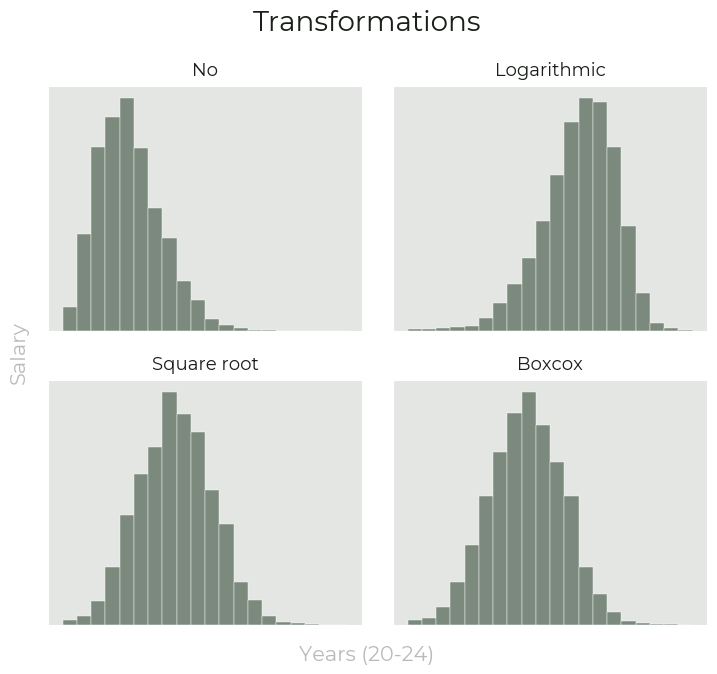

In [269]:
fig, axes = plt.subplots(2, 2, figsize=[8.5, 7])
fig.subplots_adjust(wspace=0.1, hspace=0.2)
fig.suptitle('Transformations', size=20, weight=440, y=0.99)
fig.text(x=0.08, y=0.5, s='Salary', va='center', size=15, rotation=90, alpha=0.3)
fig.text(x=0.5, y=0.06, s='Years (20-24)', ha='center', size=15, alpha=0.3)

coords = []
for y in range(2):
    for x in range(2):
        coords.append((y, x))

for n, coord in enumerate(coords, start=1):
    if n == 1:
        sns.histplot(ds.salary_in_usd, bins=20, linewidth=0.3, ax=axes[coord])
    if n == 2:
        log_salary = np.log(ds.salary_in_usd)
        sns.histplot(log_salary, bins=20, linewidth=0.3, ax=axes[coord])
    if n == 3:
        y_sqrt = np.sqrt(ds.salary_in_usd)
        sns.histplot(y_sqrt, bins=20, linewidth=0.3, ax=axes[coord])
    if n == 4:
        boxcox = stats.boxcox(ds.salary_in_usd)[0]
        sns.histplot(boxcox, bins=20, linewidth=0.3, ax=axes[coord])
    
    axes[coord].set(xlabel='', ylabel='')
    axes[coord].set_xticklabels([])
    axes[coord].set_yticklabels([])

transform_list = ['No', 'Logarithmic', 'Square root', 'Boxcox']
for name, coord in zip(transform_list, coords):
    axes[coord].set_title(name, size=13, y=1.01)

fig.figure.savefig('transform', dpi=300, bbox_inches='tight')

plt.show()

**Square root / Box-Cox transformation:**

- Compresses large values, stretches small values  
  (info loss, noise amplification)
- More sensitive to outliers than logarithmic transformation
- Logarithmic transformation better for salary prediction  
  (better accounts for the typical income distribution)

##### **Modeling** ⚙️

In [270]:
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import r2_score 

In [271]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [272]:
categorical_features = ds.select_dtypes(['category', 'object']).drop(columns=[
                                                                              'grouped_salary_usd', 
                                                                              'employee_residence',
                                                                              'job_title', 
                                                                              'country_direction',
                                                                              'country_continent'
                                                                              ]).columns

X = ds[categorical_features]
y = np.log(ds.salary_in_usd)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [273]:
preprocessor_lazy = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

In [274]:
reg = LazyRegressor(predictions=True)

X_train_transformed = pd.DataFrame(preprocessor_lazy.fit_transform(X_train))
X_test_transformed = pd.DataFrame(preprocessor_lazy.transform(X_test))

lazy_models, predictions = reg.fit(X_train_transformed, X_test_transformed, 
                                   y_train,             y_test)

lazy_models

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [10:18<00:05,  5.34s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 19475, number of used features: 93
[LightGBM] [Info] Start training from score 11.834581


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [10:19<00:00, 14.74s/it]


Adjusted R-Squared  \
Model                                                                          
LGBMRegressor                                                           0.75   
XGBRegressor                                                            0.75   
HistGradientBoostingRegressor                                           0.75   
RandomForestRegressor                                                   0.75   
BaggingRegressor                                                        0.74   
GradientBoostingRegressor                                               0.74   
NuSVR                                                                   0.73   
SVR                                                                     0.73   
LassoLarsIC                                                             0.73   
LassoCV                                                                 0.73   
ElasticNetCV                                                            0.73   
BayesianRidge                                                           0.73   
RidgeCV                                                                 0.73   
Ridge                                                                   0.73   
LassoLarsCV                                                             0.73   
PoissonRegressor                                                        0.73   
LarsCV                                                                  0.73   
ExtraTreesRegressor                                                     0.72   
HuberRegressor                                                          0.72   
ExtraTreeRegressor                                                      0.72   
DecisionTreeRegressor                                                   0.72   
OrthogonalMatchingPursuit                                               0.69   
OrthogonalMatchingPursuitCV                                             0.69   
LinearSVR                                                               0.69   
KNeighborsRegressor                                                     0.67   
GammaRegressor                                                          0.67   
TweedieRegressor                                                        0.67   
MLPRegressor                                                            0.58   
PassiveAggressiveRegressor                                              0.56   
AdaBoostRegressor                                                       0.50   
LassoLars                                                              -0.01   
ElasticNet                                                             -0.01   
DummyRegressor                                                         -0.01   
Lasso                                                                  -0.01   
QuantileRegressor                                                      -0.03   
KernelRidge                                                          -634.64   
SGDRegressor                                      -2551883100067629367296.00   
LinearRegression                                 -22810614696122007945216.00   
TransformedTargetRegressor                       -22810614696122007945216.00   
RANSACRegressor                               -21165698548418609764368384.00   
Lars                          -177430916500756766766776471732040381759488.00   

                                                                   R-Squared  \
Model                                                                          
LGBMRegressor                                                           0.76   
XGBRegressor                                                            0.76   
HistGradientBoostingRegressor                                           0.76   
RandomForestRegressor                                                   0.75   
BaggingRegressor                                                        0.75   
GradientBoostingRegressor                                

In [275]:
import xgboost as xgb

In [276]:
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = xgb.XGBRegressor(
    n_estimators=400, max_depth=6, 
    learning_rate=0.05, subsample=0.8, 
    colsample_bytree=0.6, reg_alpha=0.5, 
    reg_lambda=3, random_state=42
)

model_pipeline = Pipeline([('preprocessor_xgb', preprocessor_xgb),
                           ('regressor', model)])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_xgb',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['work_year', 'origin_group', 'specialization', 'experience_level',
       'company_size', 'employment_type', 'remote_ratio', 'company_location',
       'country_median', 'jobexp_median', 'salary_currency', 'cont_direct'],
      dtype='object'))])),
                ('regressor',...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=400, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [277]:
# param_grid = {
#     'regressor__max_depth': [4, 5, 6],
#     'regressor__n_estimators': [400, 500, 600],
#     'regressor__learning_rate': [0.05],
#     'regressor__subsample': [0.6, 0.8],
#     'regressor__colsample_bytree': [0.6, 0.8],
#     'regressor__reg_alpha': [0.3, 0.5, 0.8],
#     'regressor__reg_lambda': [3, 5, 8],
# }

# grid_search = GridSearchCV(
#     model_pipeline, 
#     param_grid, 
#     cv=5,
#     scoring='neg_mean_squared_error', 
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# grid_search.best_params_

In [278]:
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training R^2: {:.2f}".format(train_r2))
print("Test R^2: {:.2f}".format(test_r2))

Training R^2: 0.78
Test R^2: 0.76


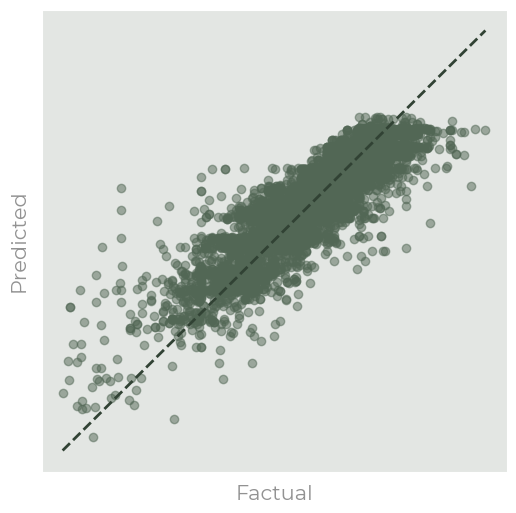

In [279]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='#526755')
plt.plot([(y_test).min(), (y_test).max()], 
         [(y_test).min(), (y_test).max()], 
         c='#314234', ls='--', lw=2)
plt.xlabel('Factual', size=15, alpha=0.5, labelpad=2)
plt.ylabel('Predicted', size=15, alpha=0.5, labelpad=2)
plt.gca().set(xticklabels='', yticklabels='')

plt.show()

In [280]:
feature_importances = model_pipeline.named_steps['regressor'].feature_importances_
feature_names = model_pipeline.named_steps['preprocessor_xgb'].named_transformers_['cat'].get_feature_names_out()

importance_tuples = sorted(zip(feature_names, (feature_importances * 100).round(2)), key=lambda x: -x[1])
importance_df = pd.DataFrame(importance_tuples, columns=['category', 'importance'])
importance_df[:10]

category  importance
0                jobexp_median_Above       19.27
1                jobexp_median_Below       18.28
2               country_median_>120k       14.04
3               origin_group_Analyst        6.89
4  cont_direct_North America | North        4.97
5                experience_level_EN        3.30
6                salary_currency_USD        2.98
7                experience_level_SE        2.72
8               jobexp_median_(n<15)        1.82
9                experience_level_EX        1.55

**Partial dependence plots (PDPs)**

In [281]:
ds.groupby(['country_continent']).jobexp_median.value_counts(normalize=True)

country_continent  jobexp_median
Africa             Below           0.60
                   Above           0.23
                   (n<15)          0.16
Asia               Below           0.65
                   (n<15)          0.28
                   Above           0.07
Australia          Below           0.43
                   Above           0.40
                   (n<15)          0.17
Europe             Below           0.79
                   Above           0.11
                   (n<15)          0.10
North America      Above           0.51
                   Below           0.44
                   (n<15)          0.04
South America      Below           0.90
                   Above           0.09
                   (n<15)          0.01
Name: proportion, dtype: float64

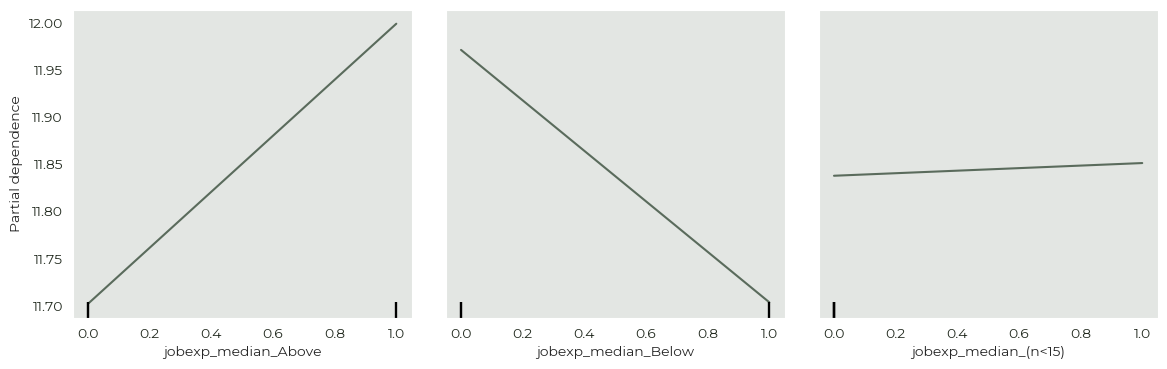

In [282]:
from sklearn.inspection import PartialDependenceDisplay

plot_features = [
    'jobexp_median_Above', 
    'jobexp_median_Below', 
    'jobexp_median_(n<15)'
]

fig, ax = plt.subplots(figsize=[14, 4])
fig.subplots_adjust(hspace=0.3, wspace=0.1)

def partial_dependency(model=None, X=None, features=None, categorical_features=None, ax=ax):

    if categorical_features == None:
        X = pd.get_dummies(X)
        X_train_dummies = X.T.reset_index(drop=1).T
        model_fitted = model.fit(X_train_dummies, y_train)
        model_fitted.get_booster().feature_names = list(X.columns)
        model = model_fitted
        
    pdp_display = PartialDependenceDisplay.from_estimator(model, X, features, categorical_features=categorical_features, ax=ax)

    fig.figure.savefig('pdp_jobexp_USA', dpi=300, bbox_inches='tight')
    
    return pdp_display

partial_dependency(model, X_train, plot_features)

plt.show()

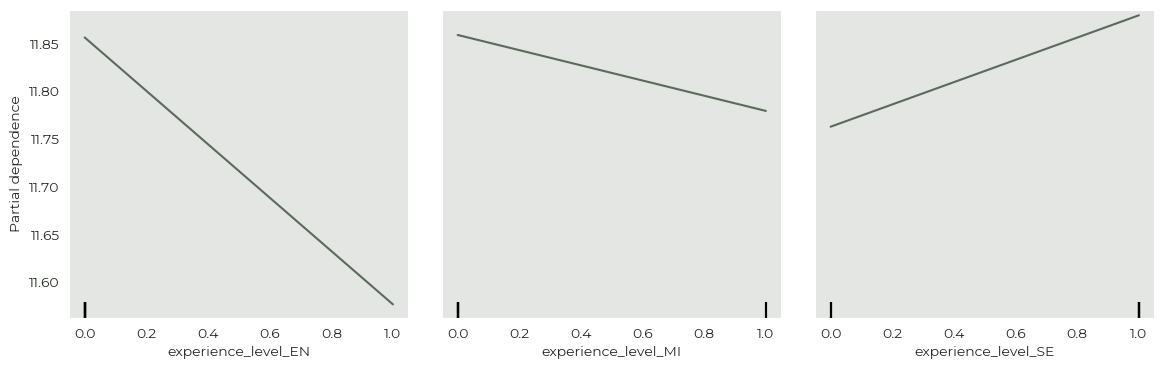

In [283]:
plot_features = [
    'experience_level_EN',
    'experience_level_MI',
    'experience_level_SE',
]

fig, axes = plt.subplots(figsize=[14, 4])
fig.subplots_adjust(wspace=0.1)

partial_dependency(model, X_train, plot_features, ax=axes)

# fig.figure.savefig('pdp_origin_group_withoutUSA', dpi=300, bbox_inches='tight')

plt.show()

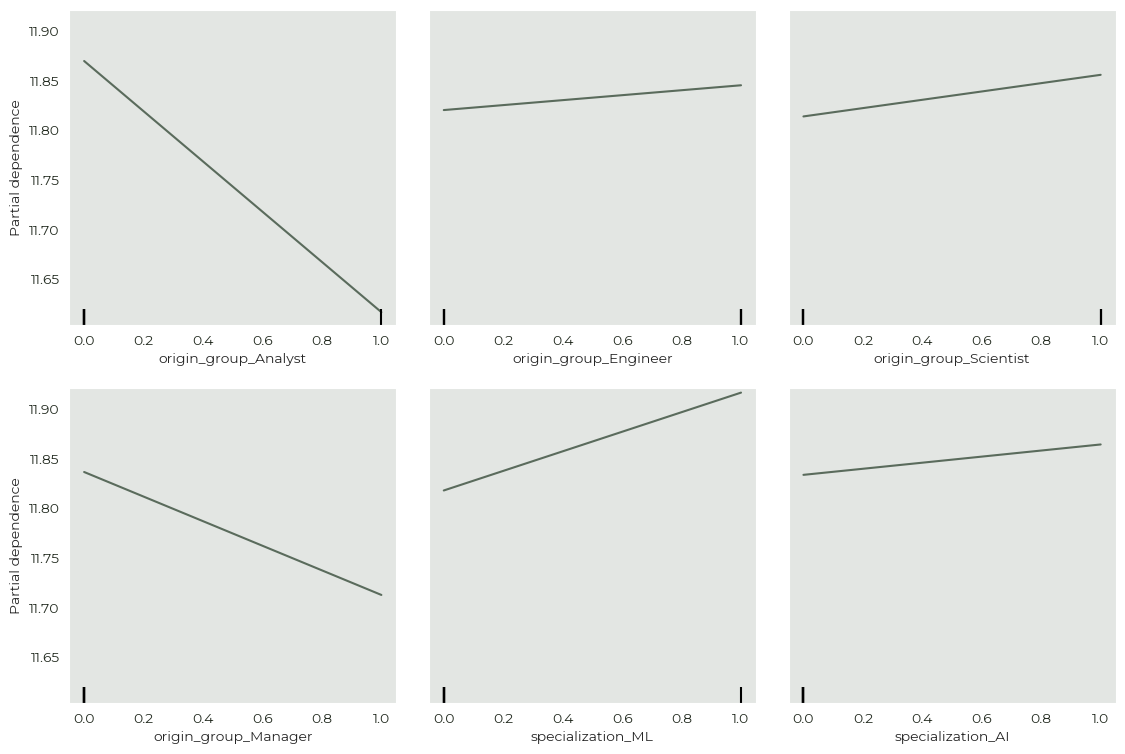

In [284]:
plot_features = [
    'origin_group_Analyst',
    'origin_group_Engineer',
    'origin_group_Scientist',
    'origin_group_Manager',
    'specialization_ML',
    'specialization_AI',
]

fig, axes = plt.subplots(figsize=[13.5, 9])
fig.subplots_adjust(wspace=0.1)

partial_dependency(model, X_train, plot_features, ax=axes)

fig.figure.savefig('pdp_origin_group_withoutUSA', dpi=300, bbox_inches='tight')

plt.show()

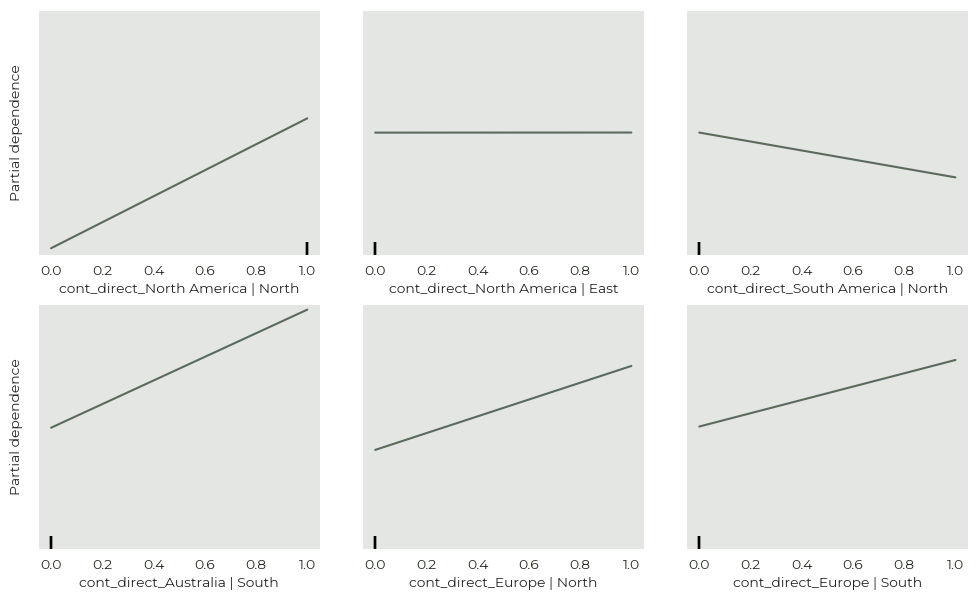

In [285]:
plot_features = [
    'cont_direct_North America | North',
    'cont_direct_North America | East',
    'cont_direct_South America | North',
    'cont_direct_Australia | South',
    'cont_direct_Europe | North',
    'cont_direct_Europe | South',
    # 'cont_direct_Africa | South',
    # 'cont_direct_Africa | North',
    # 'cont_direct_Africa | East',
    # 'cont_direct_Africa | West',
    # 'cont_direct_Asia | South',
    # 'cont_direct_Asia | North',
    # 'cont_direct_Asia | East',
    # 'cont_direct_Asia | West'
]

fig, axes = plt.subplots(2, 3, figsize=[12, 7], sharey=True)
fig.subplots_adjust(wspace=0.15)

partial_dependency(model, X_train, plot_features, ax=axes)

plt.show()

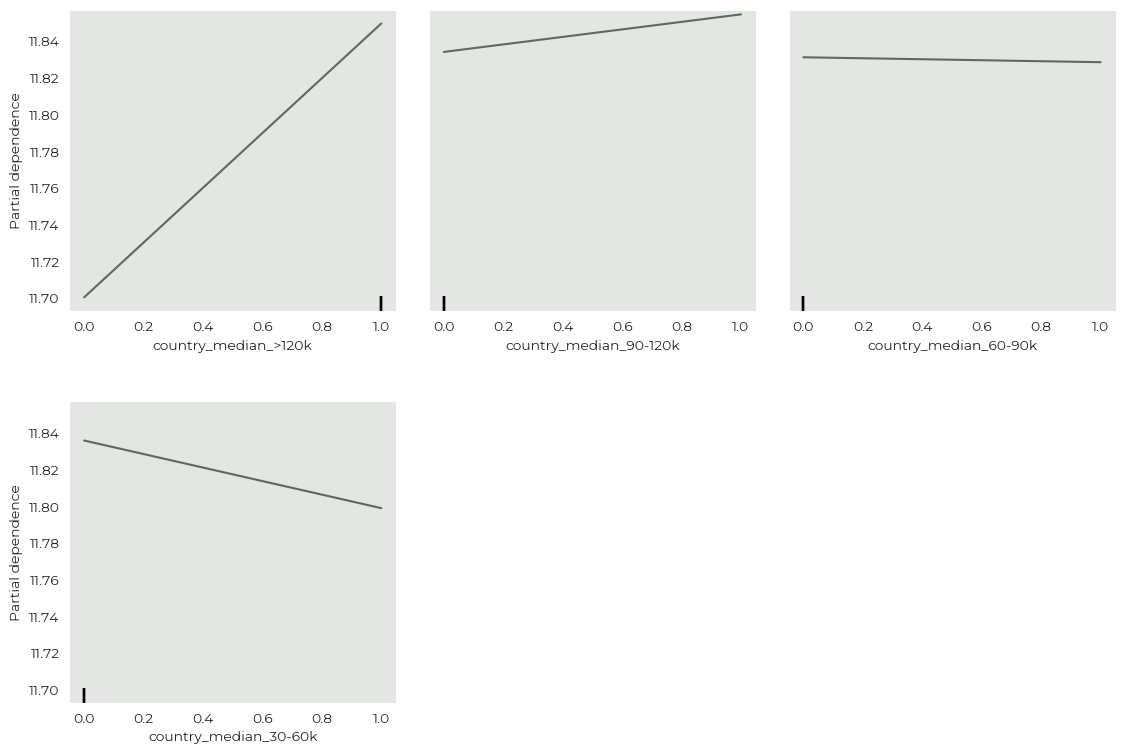

In [286]:
plot_features = [
    'country_median_>120k',
    'country_median_90-120k',
    'country_median_60-90k',
    'country_median_30-60k'
]

fig, axes = plt.subplots(figsize=[13.5, 9])
fig.subplots_adjust(hspace=0.3, wspace=0.1) 

partial_dependency(model, X_train, plot_features, ax=axes)

# fig.figure.savefig('pdp_country_median_USA', dpi=300, bbox_inches='tight')

plt.show()

In [287]:
ds_category = pd.get_dummies(ds.select_dtypes(['category']).drop(columns=['grouped_salary_usd', 'employee_residence', 
                                                                          'country_direction', 'country_continent']))

results = []

for x in ds_category.columns:
    for y in ds_category.columns[ds_category.columns != x]:
        contingency_table = pd.crosstab(ds_category[x], ds_category[y])
        chi2, pvalue, dof, expected = stats.chi2_contingency(contingency_table)
        cramer_v = stats.contingency.association(contingency_table, method='cramer')

        result = {
            'xx': x,
            'xy': y,
            'chi2': f'{chi2:.2f}',
            'pvalue': f'{pvalue:.4f}',
            'cramerv': f'{cramer_v:.2f}'
        }
        results.append(result)

relation_test = pd.DataFrame(results)
relation_test.set_index(['xx', 'xy'], inplace=True)

In [288]:
relation_test[
                (relation_test.pvalue.astype('float') <= 0.05)& \
                (relation_test.cramerv.astype('float') >= 0.3)& \
                (relation_test.index.to_frame().xx.isin( ['jobexp_median_Above',
                                                          'experience_level_EN',
                                                          'experience_level_SE',
                                                          'cont_direct_North America | North', 
                                                          'country_median_>120k', 
                                                          'origin_group_Analyst'] )) \
][['cramerv']]

cramerv
xx                   xy                            
origin_group_Analyst origin_group_Engineer     0.38
                     experience_level_EN       0.37
experience_level_EN  origin_group_Analyst      0.37
                     experience_level_SE       0.38
experience_level_SE  experience_level_EN       0.38
                     experience_level_MI       0.78
country_median_>120k company_location_GB       0.66
                     company_location_Other    0.32
                     company_location_US       0.83
                     country_median_(n<30)     0.32
                     country_median_30-60k     0.42
                     country_median_60-90k     0.79
                     salary_currency_EUR       0.49
                     salary_currency_GBP       0.61
                     salary_currency_USD       0.81
jobexp_median_Above  jobexp_median_Below       0.91

### 💼👨‍💼 Staff Demand 

**Analyze demand for specialists across years (2024 vs 2023)**

##### 🔷 **Overall**:  

- Top 10
- Top 3 by group  
   (where n>30)

🔸 Top 10

⬇ 2023

In [289]:
count_staff_2023 = (ds.query('work_year == "23"').job_title.value_counts(normalize=True) * 100).to_frame()
count_staff_2024 = (ds.query('work_year == "24"').job_title.value_counts(normalize=True) * 100).to_frame()

staff_merged_2023 = pd.merge(count_staff_2023, count_staff_2024, 
                              left_on = count_staff_2023.index, right_index = True, \
                              suffixes = ['_2023', '_2024']) \
                       .drop(columns = 'key_0')

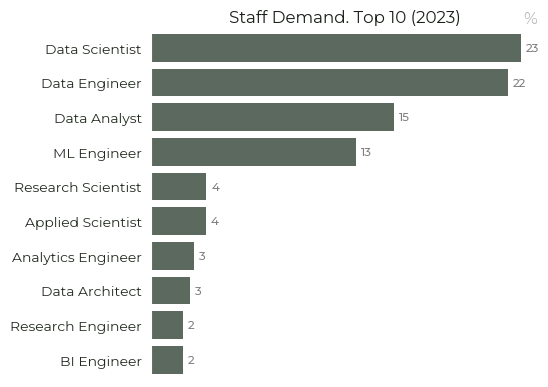

In [290]:
def top10_staff_demand(data_year, title:str=''):
    fig = plt.figure(figsize=[5, 4.5])
    ax = sns.barplot(data_year[:10], x='proportion', y='job_title', orient='h')
    ax.set(title=title, ylabel='', xlabel='', xticklabels='')
    ax.set_facecolor('w')
    ax.text(0.96, 1.02, '%', transform=ax.transAxes, alpha=0.3, size=12)
    
    for i, bar in enumerate(ax.patches):
        ax.text(bar.get_width() + (data_year.max() * 0.014), 
                bar.get_y() + 0.5, 
                f'{np.ceil(data_year["proportion"].iloc[i]).astype('int')}',
                ma='center', fontsize=8.4, fontweight='medium', color='grey')
        
    plt.show()

top10_staff_demand(count_staff_2023, title='Staff Demand. Top 10 (2023)')

In [291]:
staff_merged_2023['diff_2023_%'] = ((staff_merged_2023.iloc[:, 0] / staff_merged_2023.iloc[:, 1] - 1) * 100).astype('int')

staff_merged_2023[['diff_2023_%']][:10].sort_values(by='diff_2023_%', ascending=False).style.background_gradient(cmap='bone')

[Text(0.5, 1.0, 'Staff Demand. Origin groups (2023)'), None]

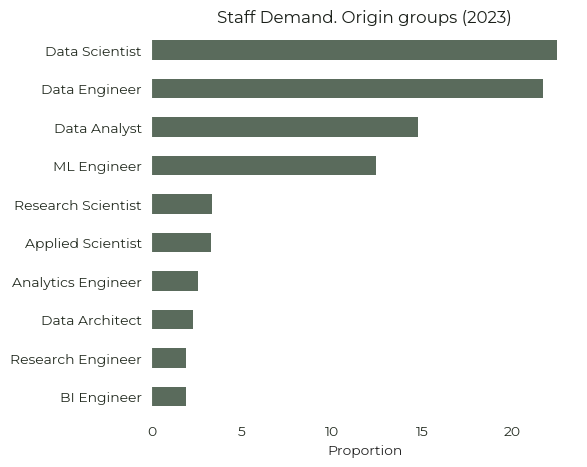

In [292]:
ax = count_staff_2023[:10].sort_values(by='proportion', ascending=True).plot(kind='barh', figsize=[5.5, 5], legend=0, ylabel='', xlabel='Proportion')
ax.set(title='Staff Demand. Origin groups (2023)', facecolor='w')

⬇ 2024

In [293]:
staff_merged_2024 = pd.merge(count_staff_2024, count_staff_2023, 
                              left_on = count_staff_2024.index, right_index = True, \
                              suffixes = ['_2024', '_2023']) \
                       .drop(columns = 'key_0')

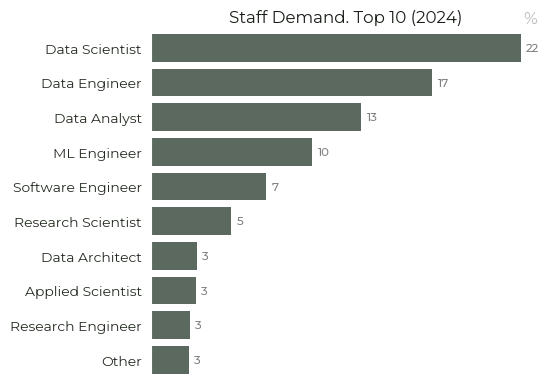

In [294]:
top10_staff_demand(count_staff_2024, title='Staff Demand. Top 10 (2024)')

In [295]:
# ds.query('specialization == "Research"').groupby('work_year')['origin_group'].value_counts(normalize=1)[-50:]

In [296]:
staff_merged_2024['diff_2024_%'] = ((staff_merged_2024.iloc[:, 0] / staff_merged_2024.iloc[:, 1] - 1) * 100).astype('int')

staff_merged_2024[['diff_2024_%']][:10].sort_values(by='diff_2024_%', ascending=False).style.background_gradient(cmap='bone')

[Text(0.5, 1.0, 'Staff Demand. Origin groups (2024)'), None]

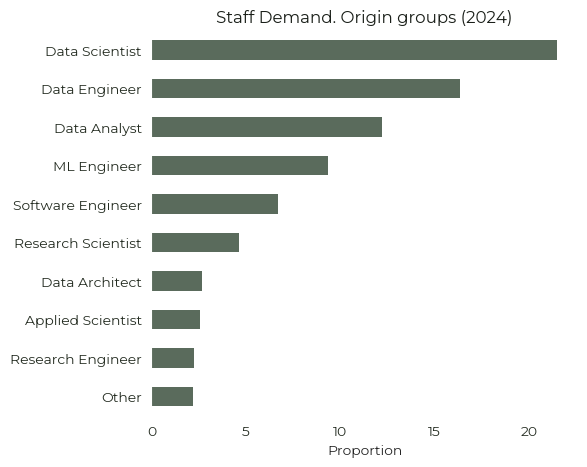

In [297]:
ax = count_staff_2024[:10].sort_values(by='proportion', ascending=True).plot(kind='barh', figsize=[5.5, 5], legend=0, ylabel='', xlabel='Proportion')
ax.set(title='Staff Demand. Origin groups (2024)', facecolor='w')

🔸 Top 3 by group (where n>30)
- Data  
- Engineer  
- Scientist  
- Analyst  
- ML  
- AI  
- BI  
- Manager  
- Research  
- Applied  

In [298]:
def staff_job_group(job_group:str, variable:str=None, variable_trait=None):

    dict = {}
    for i in [2023, 2024]:
        if variable == None:
            group = filtered_job[job_group].query('work_year == @i')
        else:
            group = filtered_job[job_group].query('work_year == @i')
            group = group[group[variable] == variable_trait]
        
        _ = group.job_title.value_counts(normalize=True).to_frame()
        _['count'] = group.job_title.value_counts()
        
        group = (_.query('count >= 30').drop(columns='count')[:3] * 100).round(0).astype('int')
        group = group.reset_index().rename(columns={'job_title': 'title_' + str(i), 'proportion': '%_' + str(i)})
        dict[i] = group

    concated = pd.concat([dict[2023], dict[2024]], axis=1)
    
    if variable == None:
        concated.index.name = f'"{job_group}"'
    else:
        concated.index.name = f'"{job_group}" + {variable} ({variable_trait})'
        
    return concated.style.background_gradient(cmap='bone')

---
**DATA**

In [299]:
staff_job_group('Data')

In [300]:
staff_job_group('Data', variable='experience_level', variable_trait='EN')

In [301]:
staff_job_group('Data', variable='experience_level', variable_trait='MI')

In [302]:
staff_job_group('Data', variable='experience_level', variable_trait='SE')

In [303]:
staff_job_group('Data', variable='experience_level', variable_trait='EX')

---
**ENGINEER**

In [304]:
staff_job_group('Engineer')

In [305]:
staff_job_group('Engineer', variable='experience_level', variable_trait='EN')

In [306]:
staff_job_group('Engineer', variable='experience_level', variable_trait='MI')

In [307]:
staff_job_group('Engineer', variable='experience_level', variable_trait='SE')

In [308]:
staff_job_group('Engineer', variable='experience_level', variable_trait='EX')

---
**SCIENTIST**

In [309]:
staff_job_group('Scientist')

In [310]:
staff_job_group('Scientist', variable='experience_level', variable_trait='EN')

In [311]:
staff_job_group('Scientist', variable='experience_level', variable_trait='MI')

In [312]:
staff_job_group('Scientist', variable='experience_level', variable_trait='SE')

In [313]:
staff_job_group('Scientist', variable='experience_level', variable_trait='EX')

---
**ANALYST**

In [314]:
staff_job_group('Analyst')

In [315]:
staff_job_group('Analyst', variable='experience_level', variable_trait='EN')

In [316]:
staff_job_group('Analyst', variable='experience_level', variable_trait='MI')

In [317]:
staff_job_group('Analyst', variable='experience_level', variable_trait='SE')

In [318]:
staff_job_group('Analyst', variable='experience_level', variable_trait='EX')

---
**ML**

In [319]:
staff_job_group('ML')

In [320]:
staff_job_group('ML', variable='experience_level', variable_trait='EN')

In [321]:
staff_job_group('ML', variable='experience_level', variable_trait='MI')

In [322]:
staff_job_group('ML', variable='experience_level', variable_trait='SE')

In [323]:
staff_job_group('ML', variable='experience_level', variable_trait='EX')

---
**AI**

In [324]:
staff_job_group('AI')

In [325]:
staff_job_group('AI', variable='experience_level', variable_trait='EN')

In [326]:
staff_job_group('AI', variable='experience_level', variable_trait='MI')

In [327]:
staff_job_group('AI', variable='experience_level', variable_trait='SE')

In [328]:
staff_job_group('AI', variable='experience_level', variable_trait='EX')

---
**BI**

In [329]:
staff_job_group('BI')

In [330]:
staff_job_group('BI', variable='experience_level', variable_trait='EN')

In [331]:
staff_job_group('BI', variable='experience_level', variable_trait='MI')

In [332]:
staff_job_group('BI', variable='experience_level', variable_trait='SE')

In [333]:
staff_job_group('BI', variable='experience_level', variable_trait='EX')

---
**MANAGER**

In [334]:
staff_job_group('Manager')

In [335]:
staff_job_group('Manager', variable='experience_level', variable_trait='EN')

In [336]:
staff_job_group('Manager', variable='experience_level', variable_trait='MI')

In [337]:
staff_job_group('Manager', variable='experience_level', variable_trait='SE')

In [338]:
staff_job_group('Manager', variable='experience_level', variable_trait='EX')

---
**RESEARCH**

In [339]:
staff_job_group('Research')

In [340]:
staff_job_group('Research', variable='experience_level', variable_trait='EN')

In [341]:
staff_job_group('Research', variable='experience_level', variable_trait='MI')

In [342]:
staff_job_group('Research', variable='experience_level', variable_trait='SE')

In [343]:
staff_job_group('Research', variable='experience_level', variable_trait='EX')

---
**APPLIED**

In [344]:
staff_job_group('Applied')

In [345]:
staff_job_group('Applied', variable='experience_level', variable_trait='EN')

In [346]:
staff_job_group('Applied', variable='experience_level', variable_trait='MI')

In [347]:
staff_job_group('Applied', variable='experience_level', variable_trait='SE')

In [348]:
staff_job_group('Applied', variable='experience_level', variable_trait='EX')

##### 🔷 **Specific**:  

- Specific:

    - Qualification
    - Company size

🔸 Qualification

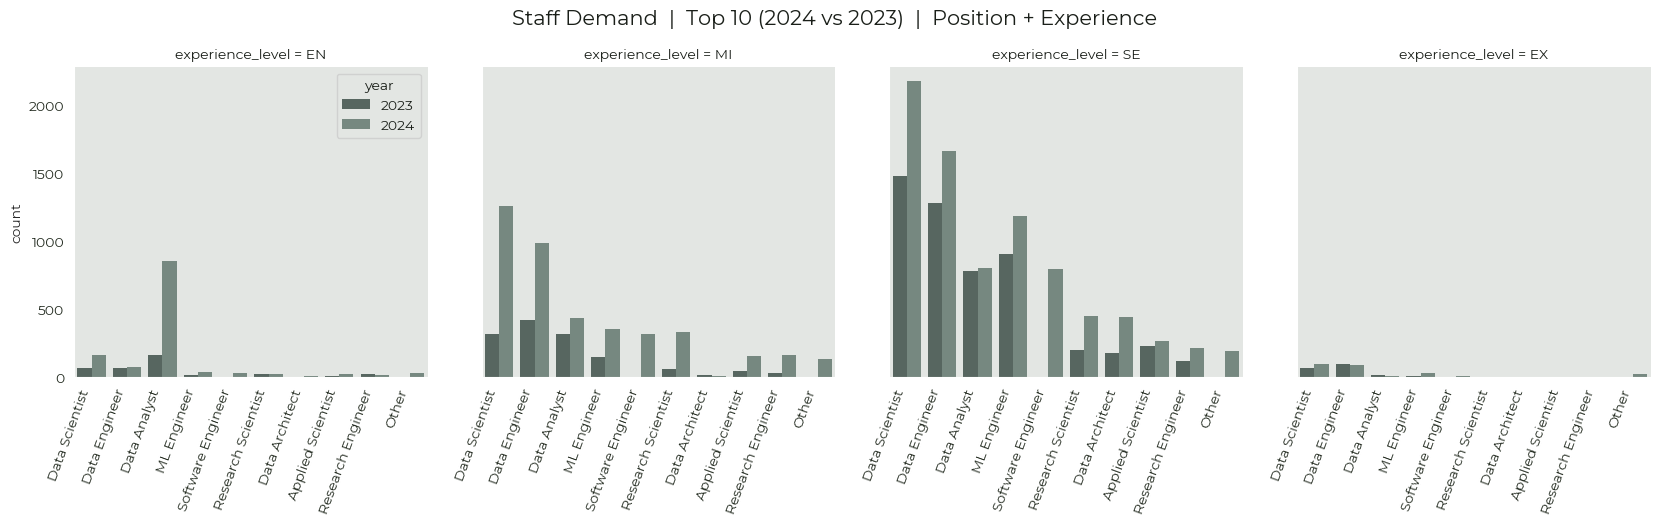

In [349]:
ds_2023 = ds.query('work_year == "23"')[ds.job_title.isin(count_staff_2023[:10].index)]
ds_2023['year'] = '2023'

ds_2024 = ds.query('work_year == "24"')[ds.job_title.isin(count_staff_2024[:10].index)]
ds_2024['year'] = '2024'

combined_ds = pd.concat([ds_2023, ds_2024])

ax = sns.catplot(
    data=combined_ds, 
    x='job_title', col='experience_level', hue='year',
    order=count_staff_2024[:10].index, col_order=['EN', 'MI', 'SE', 'EX'],
    kind='count', height=4, aspect=1.05, legend_out=False, palette=['#546860', '#738b80']
)

ax.set_xticklabels(rotation=70, ha='right')
ax.set(xlabel='')
plt.suptitle('Staff Demand  |  Top 10 (2024 vs 2023)  |  Position + Experience', y=1.06, size=15)

plt.show()

🔸 Company size

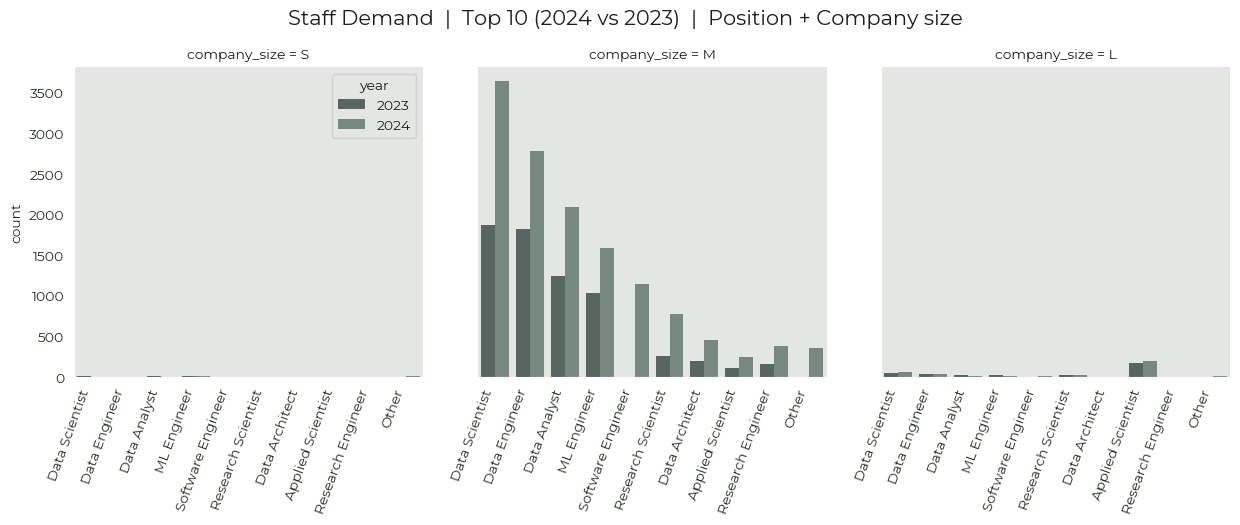

In [350]:
ax = sns.catplot(
    data=combined_ds, 
    x='job_title', col='company_size', hue='year',
    order=count_staff_2024[:10].index, col_order=['S', 'M', 'L'],
    kind='count', height=4, aspect=1.05, legend_out=False, palette=['#546860', '#738b80']
)

ax.set_xticklabels(rotation=70, ha='right')
ax.set(xlabel='')
plt.suptitle('Staff Demand  |  Top 10 (2024 vs 2023)  |  Position + Company size', y=1.06, size=15)

ax.figure.savefig('staff_pos_comp', dpi=300, bbox_inches='tight')

plt.show()

### 🏡 Remote Work

#### Compare trends in remote work adoption

Text(0.5, 1.05, 'Remote Work  |  Proportions by years')

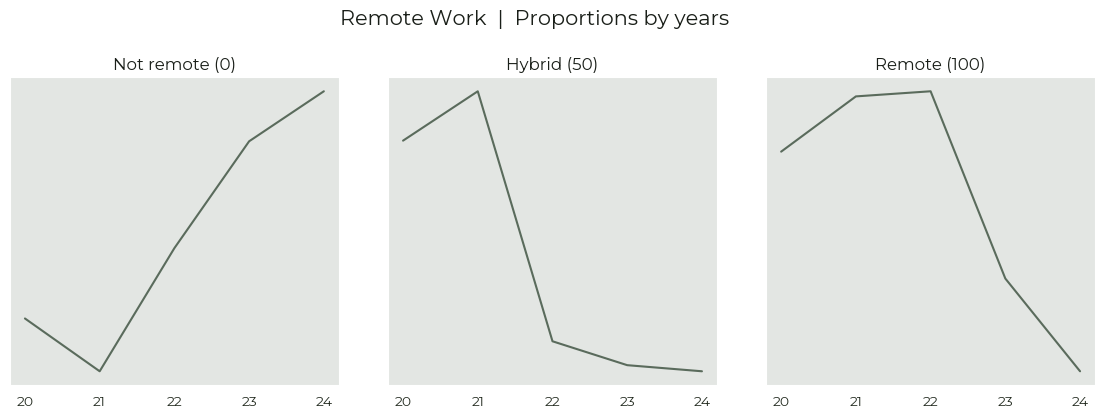

In [367]:
fig, axes = plt.subplots(1, 3, figsize=[14, 4])
fig.subplots_adjust(wspace=0.15)

_ = (ds.groupby('work_year').remote_ratio.value_counts(normalize=True) * 100).to_frame().reset_index(level=1).sort_values(by='remote_ratio').sort_index()

sns.lineplot( _.query('remote_ratio == 0').proportion, ax=axes[0])
axes[0].set(title='Not remote (0)', xlabel='', ylabel='', yticklabels='')

sns.lineplot( _.query('remote_ratio == 50').proportion, ax=axes[1])
axes[1].set(title='Hybrid (50)', xlabel='', ylabel='', yticklabels='')

sns.lineplot( _.query('remote_ratio == 100').proportion, ax=axes[2])
axes[2].set(title='Remote (100)', xlabel='', ylabel='', yticklabels='')

fig.suptitle('Remote Work  |  Proportions by years', y=1.05, size=15)

Text(0.5, 1.05, 'Remote Work  |  Median salaries')

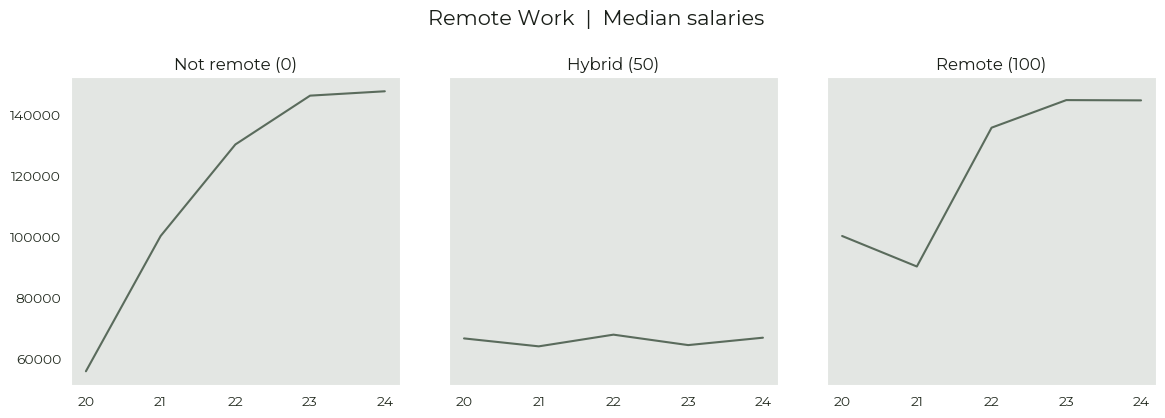

In [369]:
_['remote_median'] = ds.groupby(['work_year', 'remote_ratio']).salary_in_usd.median().to_list()

fig, axes = plt.subplots(1, 3, figsize=[14, 4], sharey=True)
fig.subplots_adjust(wspace=0.15)

sns.lineplot(_.query('remote_ratio == 0').remote_median, ax=axes[0])
axes[0].set(title='Not remote (0)', xlabel='', ylabel='')

sns.lineplot(_.query('remote_ratio == 50').remote_median, ax=axes[1])
axes[1].set(title='Hybrid (50)', xlabel='', ylabel='')

sns.lineplot(_.query('remote_ratio == 100').remote_median, ax=axes[2])
axes[2].set(title='Remote (100)', xlabel='', ylabel='')

fig.suptitle('Remote Work  |  Median salaries', y=1.05, size=15)